# stage1 - input

<Figure size 7200x4800 with 0 Axes>

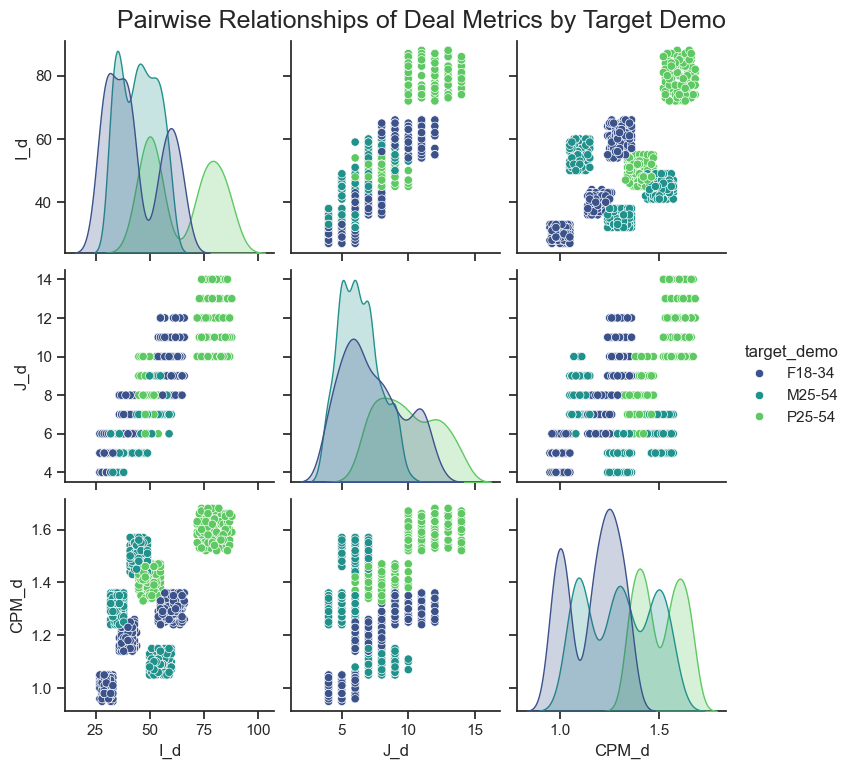

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 数据加载 ---
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/data/deals_stage1.csv'
df = pd.read_csv(file_path)

# --- 可视化：成对关系图 ---
sns.set_theme(style="ticks")
plt.figure(figsize=(12, 8), dpi=600)
# hue='target_demo' 会用颜色区分不同人群
sns.pairplot(df, hue='target_demo', palette='viridis', diag_kind='kde')

plt.suptitle('Pairwise Relationships of Deal Metrics by Target Demo', y=1.02, fontsize=18)

plt.show()

/var/folders/6q/x5wrhmps6wl4c9xg_k22gx7m0000gn/T/ipykernel_6063/1777024321.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_demo', y='CPM_d', palette='pastel')


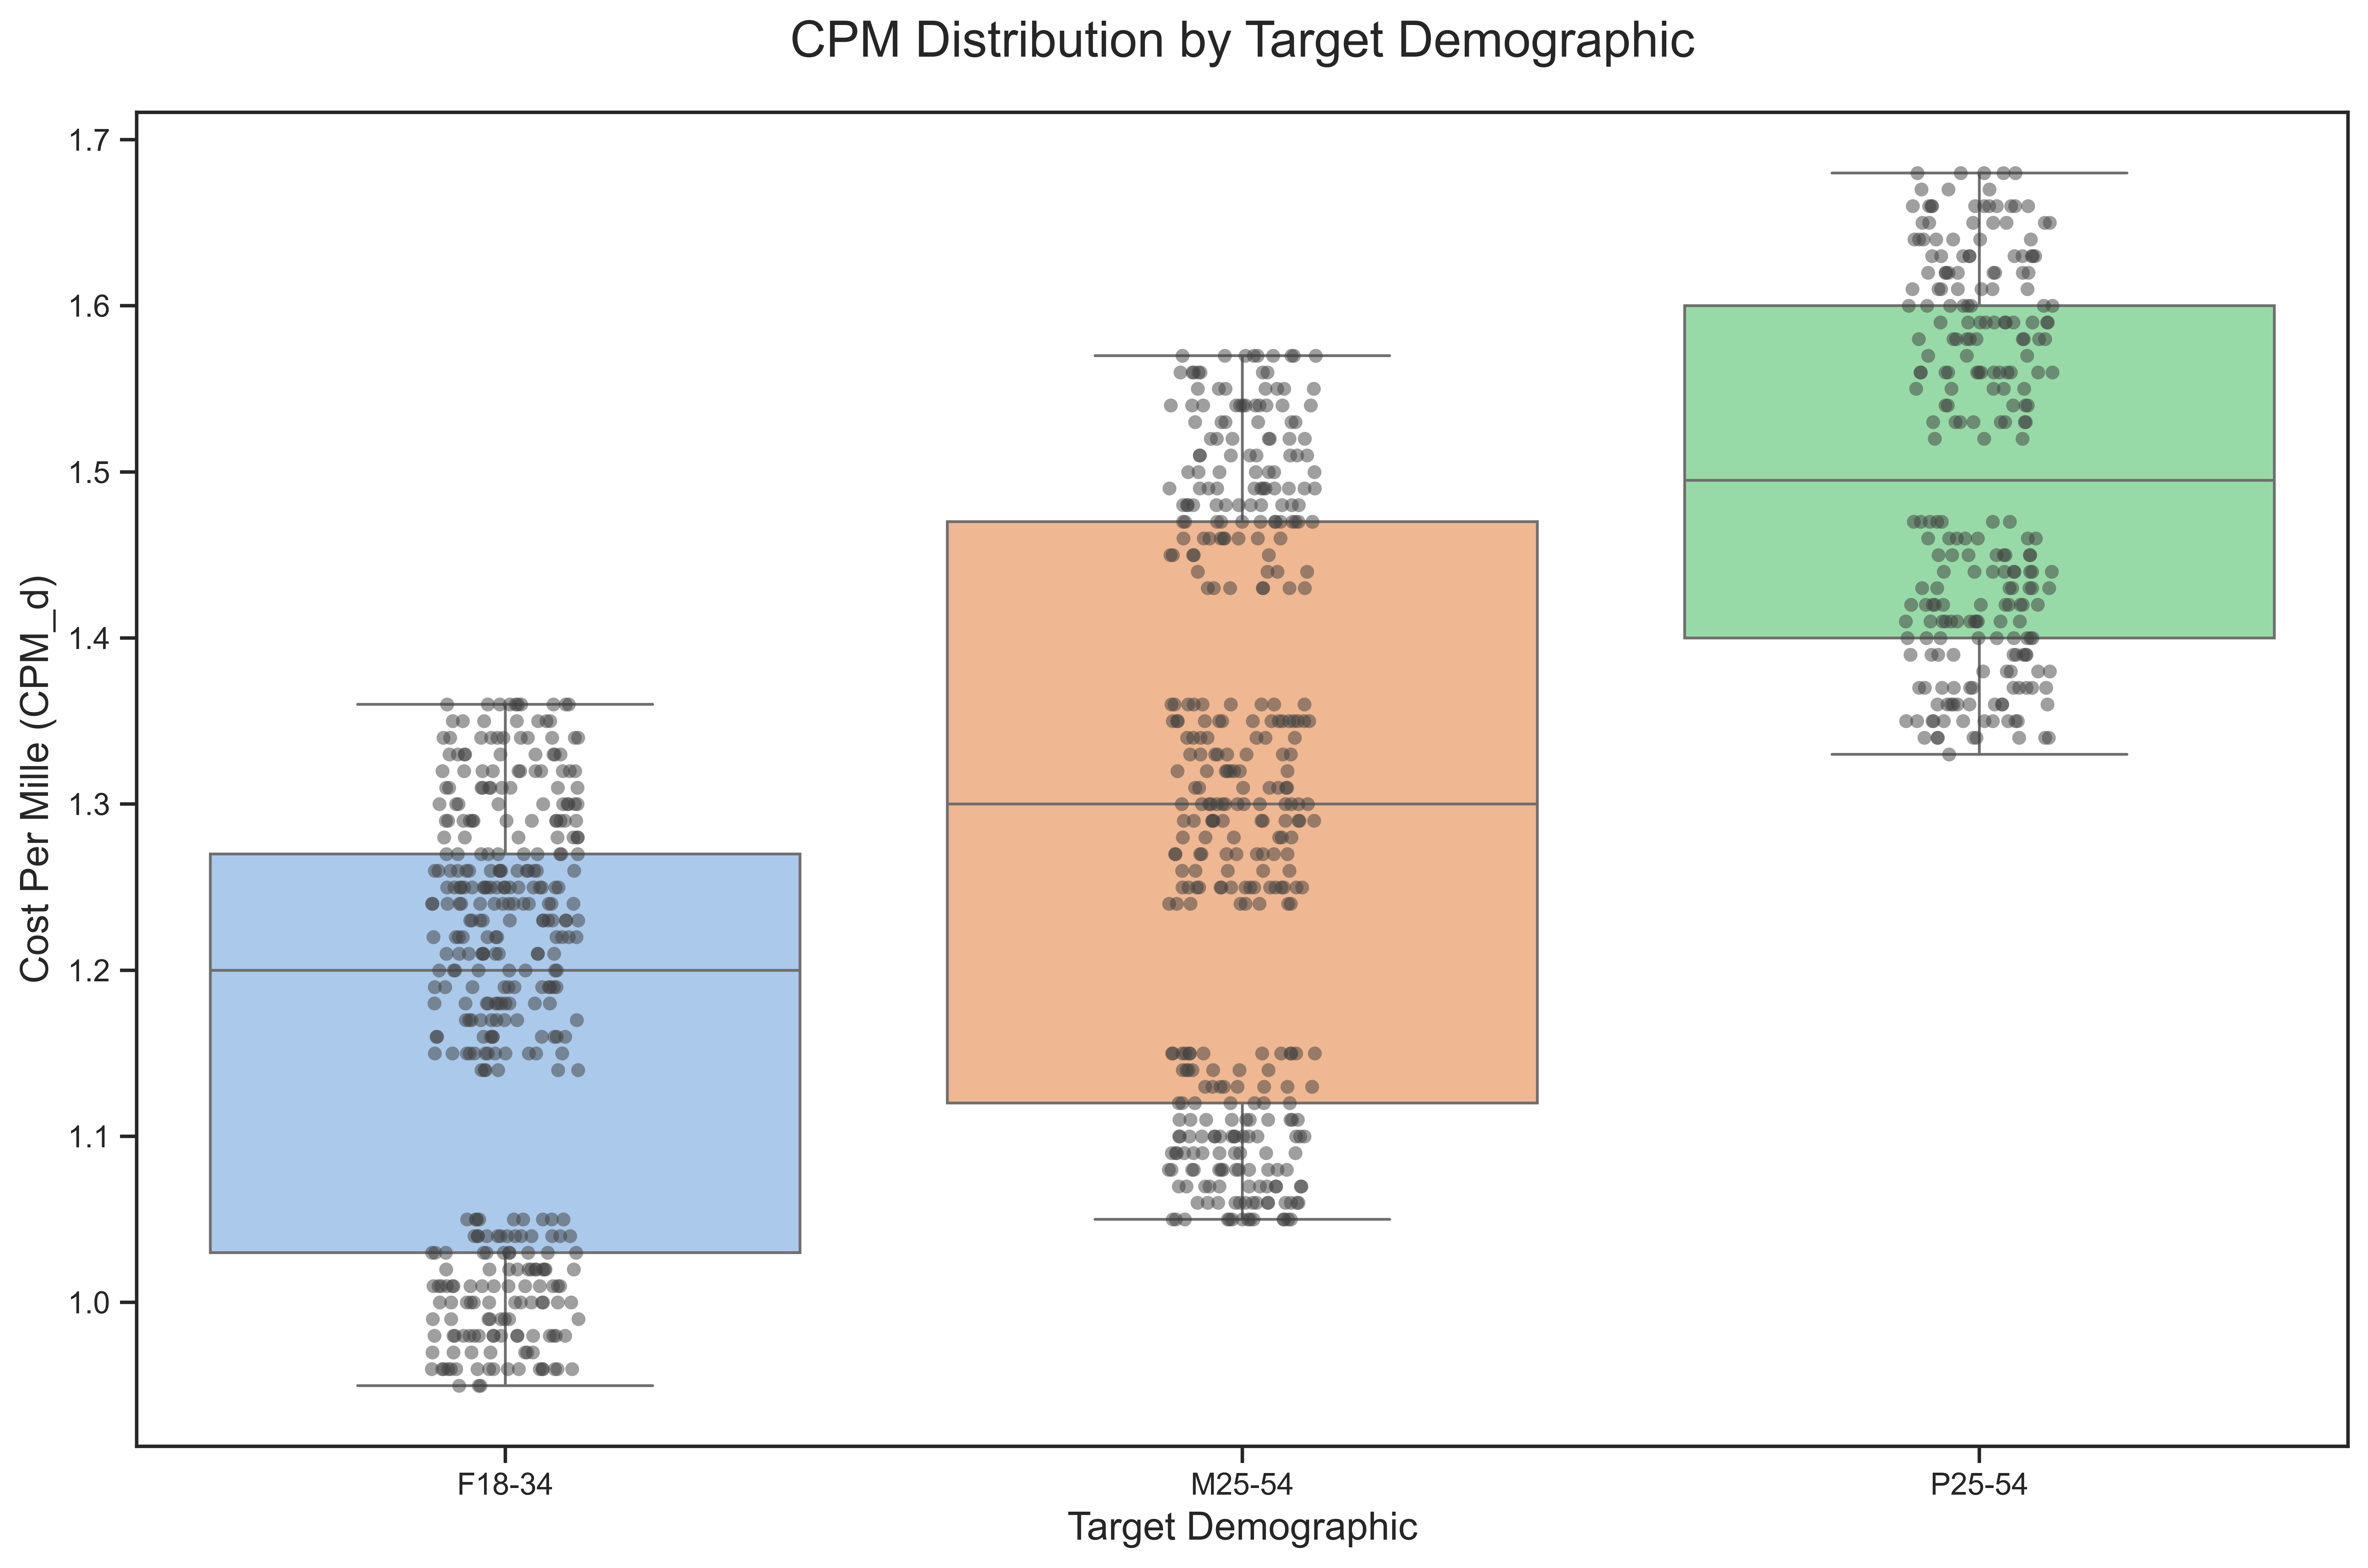

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 数据加载 ---
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/data/deals_stage1.csv'
df = pd.read_csv(file_path)

# --- 可视化：箱形图 ---
sns.set_theme(style="ticks")
plt.figure(figsize=(12, 8), dpi=600)

sns.boxplot(data=df, x='target_demo', y='CPM_d', palette='pastel')
sns.stripplot(data=df, x='target_demo', y='CPM_d', color=".25", alpha=0.5) # 叠加散点

# --- 图表美化 ---
plt.title('CPM Distribution by Target Demographic', fontsize=18, pad=20)
plt.xlabel('Target Demographic', fontsize=14)
plt.ylabel('Cost Per Mille (CPM_d)', fontsize=14)

plt.tight_layout()
plt.show()

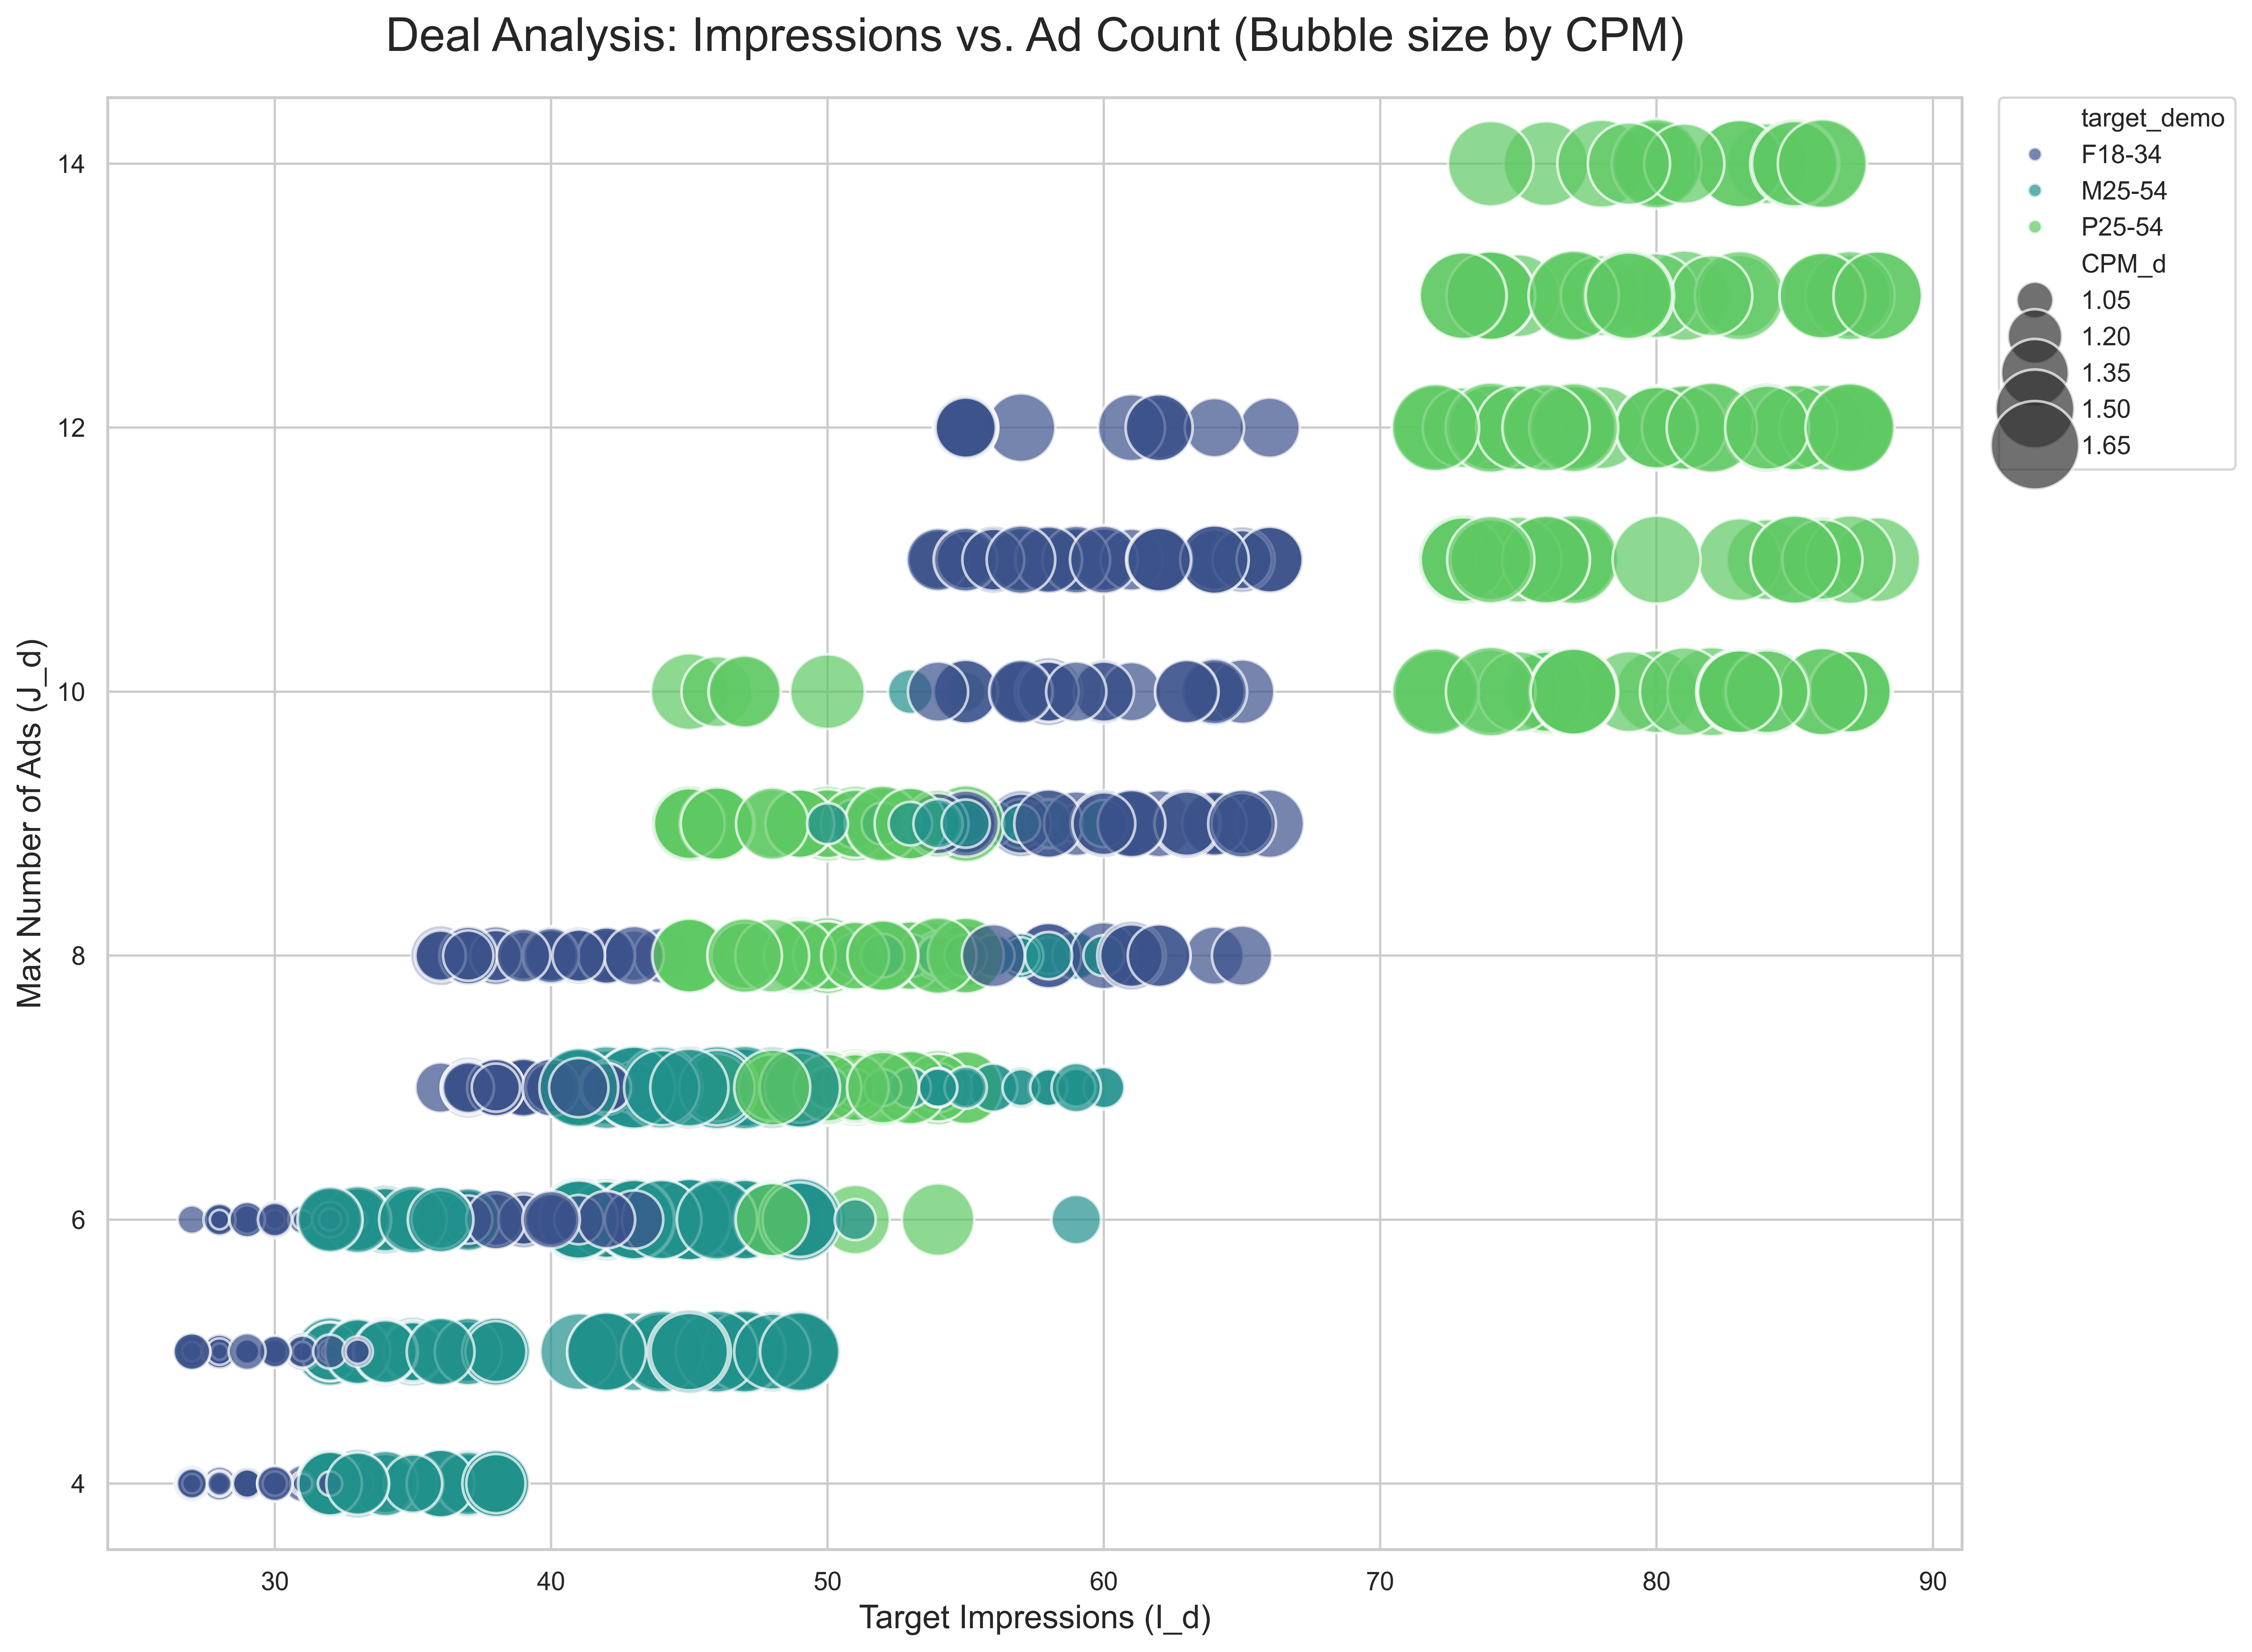

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 数据加载 ---
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/data/deals_stage1.csv'
df = pd.read_csv(file_path)

# --- 可视化：气泡图 ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10), dpi=600)

ax = sns.scatterplot(
    data=df,
    x='I_d',
    y='J_d',
    size='CPM_d',       # 用气泡大小表示 CPM
    sizes=(50, 1500),   # 控制气泡大小的范围
    hue='target_demo',  # 用颜色区分目标人群
    palette='viridis',  # 选择一个漂亮的调色板
    alpha=0.7           # 设置透明度
)

# --- 图表美化 ---
plt.title('Deal Analysis: Impressions vs. Ad Count (Bubble size by CPM)', fontsize=20, pad=20)
plt.xlabel('Target Impressions (I_d)', fontsize=14)
plt.ylabel('Max Number of Ads (J_d)', fontsize=14)

# 将图例移到图表外部
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# deal weights 

## option1

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 数据加载和排序 ---

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage1_weights.csv'

# 读取 CSV 文件到 pandas DataFrame
df = pd.read_csv(file_path)

# 按照 'W_d' 列（权重）从大到小排序
df_sorted = df.sort_values(by='W_d', ascending=False)

# --- 2. 新增步骤：随机抽样 ---
# 从排序后的数据中随机抽取 250 条记录
# 如果总数少于250，则抽取所有数据
sample_size = min(50, len(df_sorted))
df_sample = df_sorted.sample(n=sample_size, random_state=42) # random_state 确保每次抽样结果一致

# 再次排序，以保证条形图仍然是按权重降序排列的
df_sample_sorted = df_sample.sort_values(by='W_d', ascending=False)


# --- 3. 数据可视化 ---

# 设置图表大小和分辨率
plt.figure(figsize=(20, 8), dpi=600) # 增大了宽度以容纳更多条形

# 使用抽样后的数据创建条形图
sns.barplot(x='deal_id', y='W_d', data=df_sample_sorted, palette='viridis')

# 添加图表标题和坐标轴标签
plt.title(f'Visualization of Deal Weights (Random Sample of {sample_size})', fontsize=18)
plt.xlabel('Deal ID', fontsize=14)
plt.ylabel('Weight (W_d)', fontsize=14)

# 旋转x轴标签以防重叠
plt.xticks(rotation=90, ha='center', fontsize=8) # 旋转90度并减小字号

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

/var/folders/6q/x5wrhmps6wl4c9xg_k22gx7m0000gn/T/ipykernel_6063/4195778082.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deal_id', y='W_d', data=df_sample_sorted, palette='viridis')


## option2

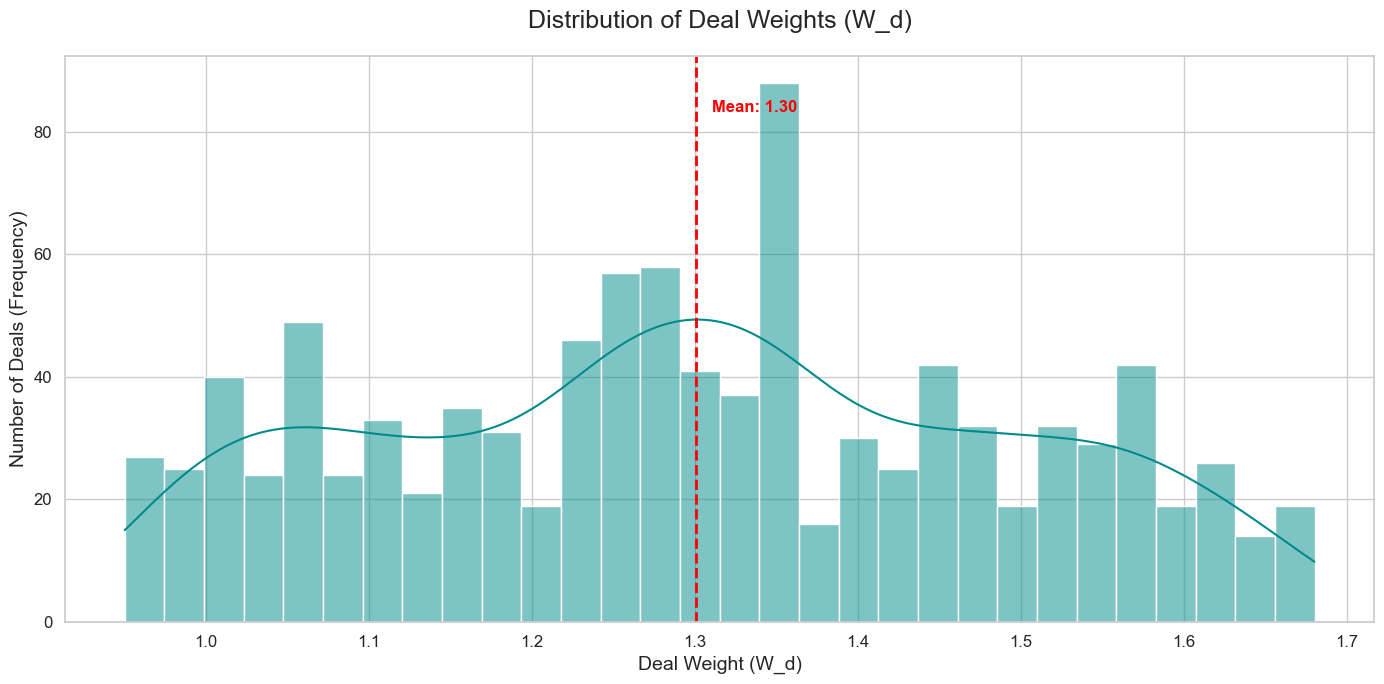

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 数据加载 ---

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage1_weights.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# --- 2. 创建更合适的可视化：直方图与KDE ---

# 设置图表美学风格和尺寸
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# 使用 seaborn 的 histplot 函数创建直方图和KDE曲线
# kde=True 会自动添加核密度估计曲线
ax = sns.histplot(data=df, x='W_d', kde=True, bins=30, color='darkcyan')

# 在图上添加一条垂直线，标记出平均权重
mean_weight = df['W_d'].mean()
ax.axvline(mean_weight, color='red', linestyle='--', linewidth=2)
ax.text(mean_weight + 0.01, ax.get_ylim()[1] * 0.9, f'Mean: {mean_weight:.2f}', color='red', fontweight='bold')


# --- 3. 图表美化 ---

# 添加图表标题和坐标轴标签
plt.title('Distribution of Deal Weights (W_d)', fontsize=18, pad=20)
plt.xlabel('Deal Weight (W_d)', fontsize=14)
plt.ylabel('Number of Deals (Frequency)', fontsize=14)

# 调整刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

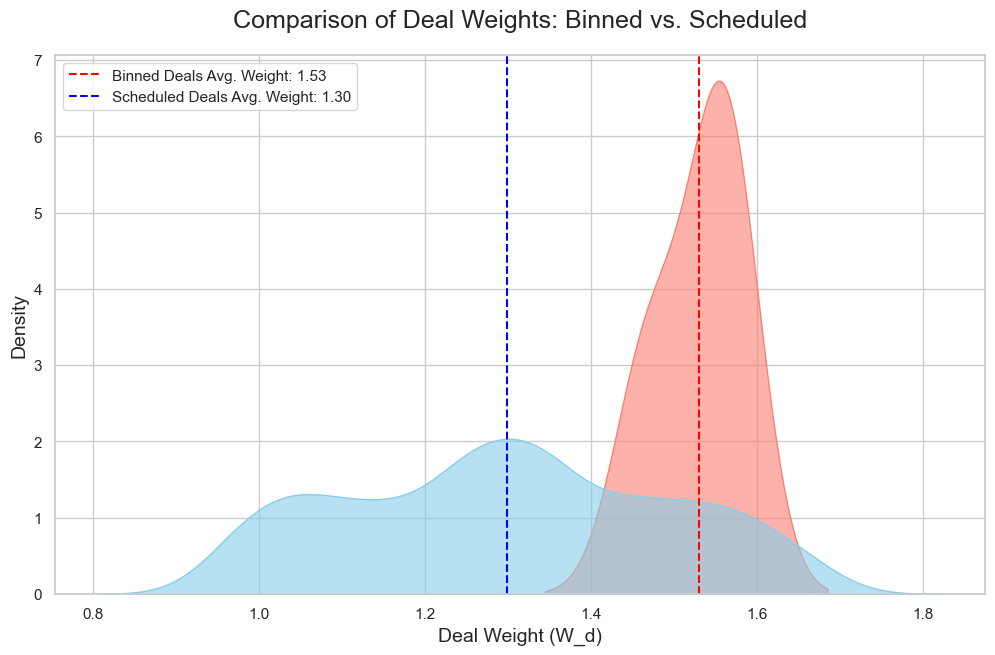

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. 数据加载 ---
schedule_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage2_schedule.csv'
weights_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage1_weights.csv'

df_schedule = pd.read_csv(schedule_path)
df_weights = pd.read_csv(weights_path)

# --- 2. 识别并标记交易状态 (核心逻辑更新) ---

# 步骤 a: 找出所有被成功排期的 deal_id
# 条件：break_id 不是 'BINNED'
scheduled_deal_ids = df_schedule[df_schedule['break_id'] != 'BINNED']['deal_id'].unique()

# 步骤 b: 在完整的权重表 (df_weights) 中标记状态
# 如果一个 deal_id 在上面的 scheduled_deal_ids 列表中，则为 'Scheduled'
# 否则，它就是被放弃的 ('Binned')，这包括了明确标记为 BINNED 和 从未出现过的两种情况
df_weights['status'] = np.where(df_weights['deal_id'].isin(scheduled_deal_ids), 'Scheduled', 'Binned')

# --- 3. 可视化对比 ---

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# 使用 seaborn 的 kdeplot 绘制密度图
ax = sns.kdeplot(
    data=df_weights, 
    x='W_d', 
    hue='status', 
    fill=True,
    common_norm=False,
    palette={'Binned': 'salmon', 'Scheduled': 'skyblue'},
    alpha=0.6
)

# --- 4. 添加辅助线和图表美化 ---

# 计算并绘制两个组的平均权重
mean_binned = df_weights[df_weights['status'] == 'Binned']['W_d'].mean()
mean_scheduled = df_weights[df_weights['status'] == 'Scheduled']['W_d'].mean()

plt.axvline(mean_binned, color='red', linestyle='--', label=f'Binned Deals Avg. Weight: {mean_binned:.2f}')
plt.axvline(mean_scheduled, color='blue', linestyle='--', label=f'Scheduled Deals Avg. Weight: {mean_scheduled:.2f}')

plt.title('Comparison of Deal Weights: Binned vs. Scheduled (Corrected Logic)', fontsize=18, pad=20)
plt.xlabel('Deal Weight (W_d)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

plt.show()

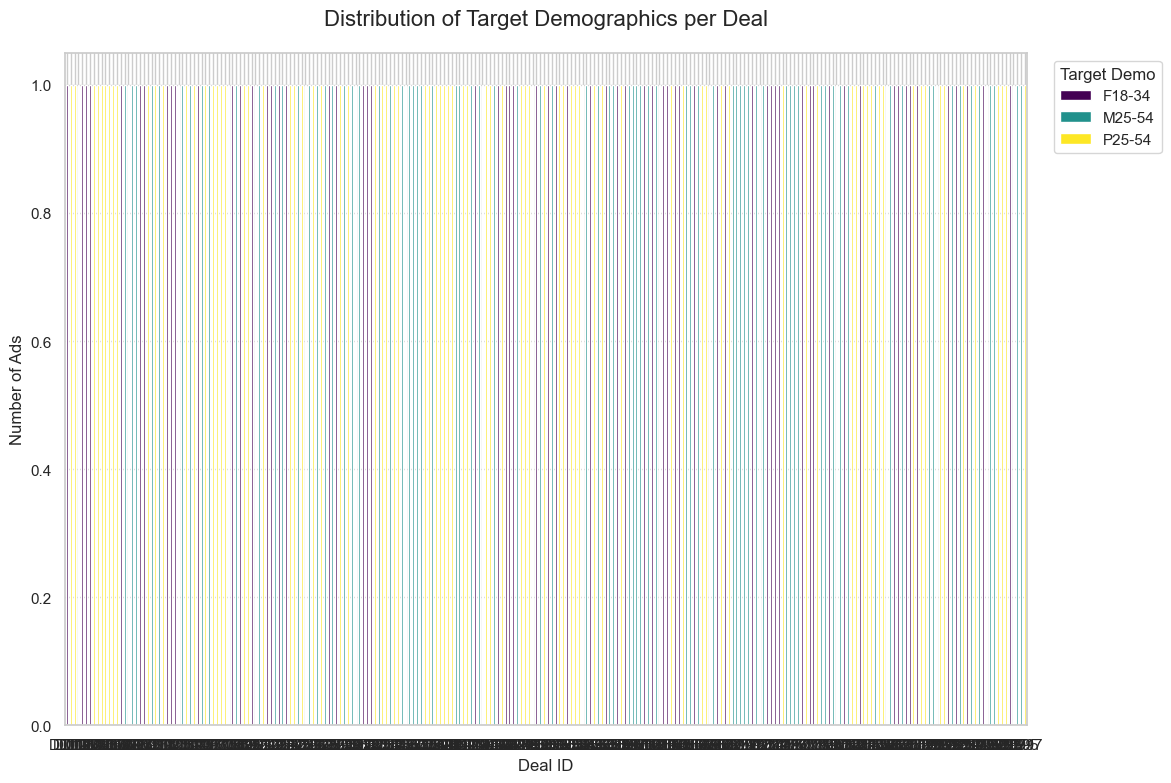

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/data/deals_stage2.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# --- 数据处理与可视化 ---

# 设置图表美学风格
sns.set_theme(style="whitegrid")

# 创建一个交叉表来统计每个 deal_id 下各个 target_demo 的数量
# 这是分析两个分类变量关系的经典方法
crosstab_df = pd.crosstab(df['deal_id'], df['target_demo'])

# 使用交叉表数据绘制堆叠条形图
# kind='bar', stacked=True 是绘制堆叠条形图的关键
ax = crosstab_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# 添加图表标题和坐标轴标签
plt.title('Distribution of Target Demographics per Deal', fontsize=16, pad=20)
plt.xlabel('Deal ID', fontsize=12)
plt.ylabel('Number of Ads', fontsize=12)

# 旋转x轴标签以使其更易读
plt.xticks(rotation=0)

# 将图例放置在图表外部，防止遮挡
plt.legend(title='Target Demo', bbox_to_anchor=(1.02, 1), loc='upper left')

# 自动调整布局
plt.tight_layout(rect=[0, 0, 0.85, 1]) # 调整布局为图例留出空间

# 显示图表
plt.show()


# break - brand

/var/folders/6q/x5wrhmps6wl4c9xg_k22gx7m0000gn/T/ipykernel_6063/912641374.py:34: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


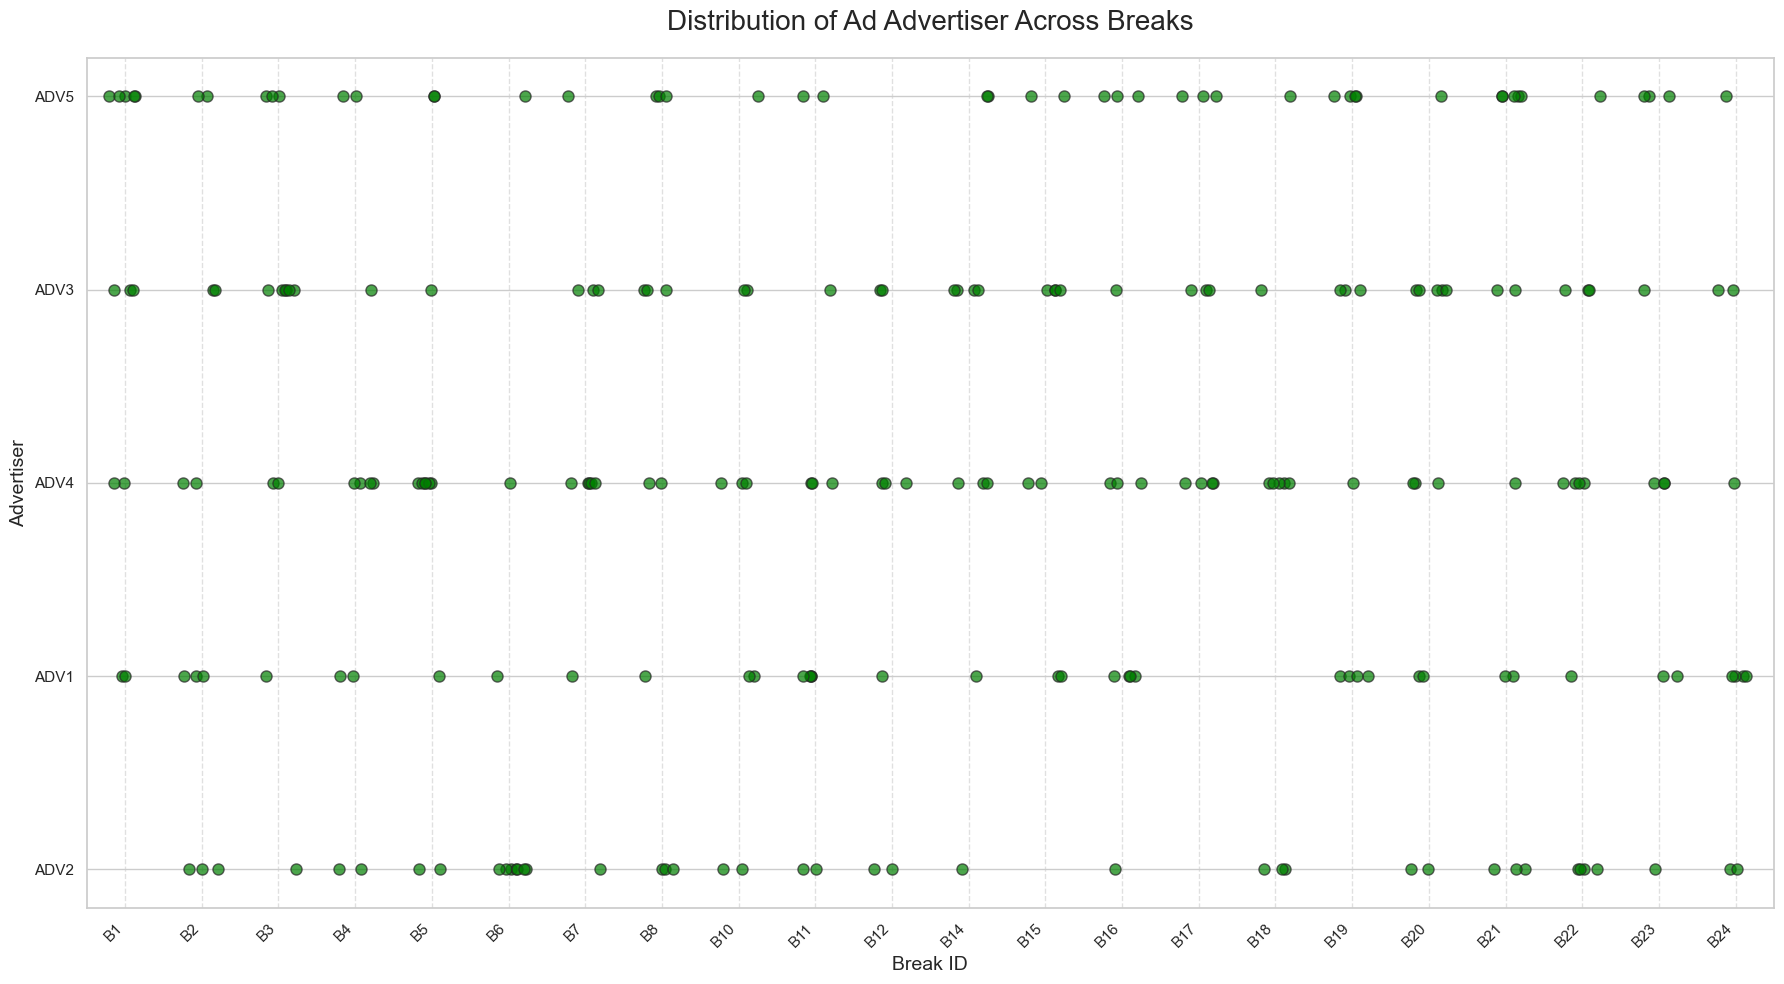

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- 1. 数据加载和预处理 ---

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage2_schedule.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 过滤掉未被排期的广告 (break_id 为 'BINNED')
df_scheduled = df[df['break_id'] != 'BINNED'].copy()

# --- 2. 对 break_id 进行自然排序 ---

# 为了让 X 轴上的 break_id 按照 B1, B2, B3... 而不是 B1, B10, B11... 的字母顺序排序，
# 我们需要提取 break_id 中的数字并将其转换为整数进行排序。
df_scheduled['break_num'] = df_scheduled['break_id'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
df_sorted = df_scheduled.sort_values('break_num')

# 获取排序后唯一的 break_id 列表，以确保 X 轴的顺序是正确的
break_order = df_sorted['break_id'].unique()

# --- 3. 可视化 ---

# 设置图表尺寸
plt.figure(figsize=(18, 10))

# 使用 seaborn 的 stripplot 创建分类散点图
# stripplot 非常适合显示一个分类变量和一个连续/分类变量之间的关系
sns.stripplot(
    x='break_id',
    #  y='brand', # advertiser
    y = 'advertiser',
    data=df_sorted,
    color='green',
    order=break_order,  # 强制指定 X 轴的顺序
    jitter=0.25,        # 添加一些随机抖动，防止点重叠
    size=8,             # 增大点的大小以便观察
    alpha=0.7,          # 设置透明度
    linewidth=1,        # 给点加上边框
    edgecolor='gray'    # 边框颜色
)

# 添加图表标题和坐标轴标签
plt.title('Distribution of Ad Advertiser Across Breaks', fontsize=20, pad=20)
plt.xlabel('Break ID', fontsize=14)
plt.ylabel('Advertiser', fontsize=14)

# 旋转 X 轴标签以防重叠
plt.xticks(rotation=45, ha='right')

# 添加网格线，使 break 之间的分隔更清晰
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

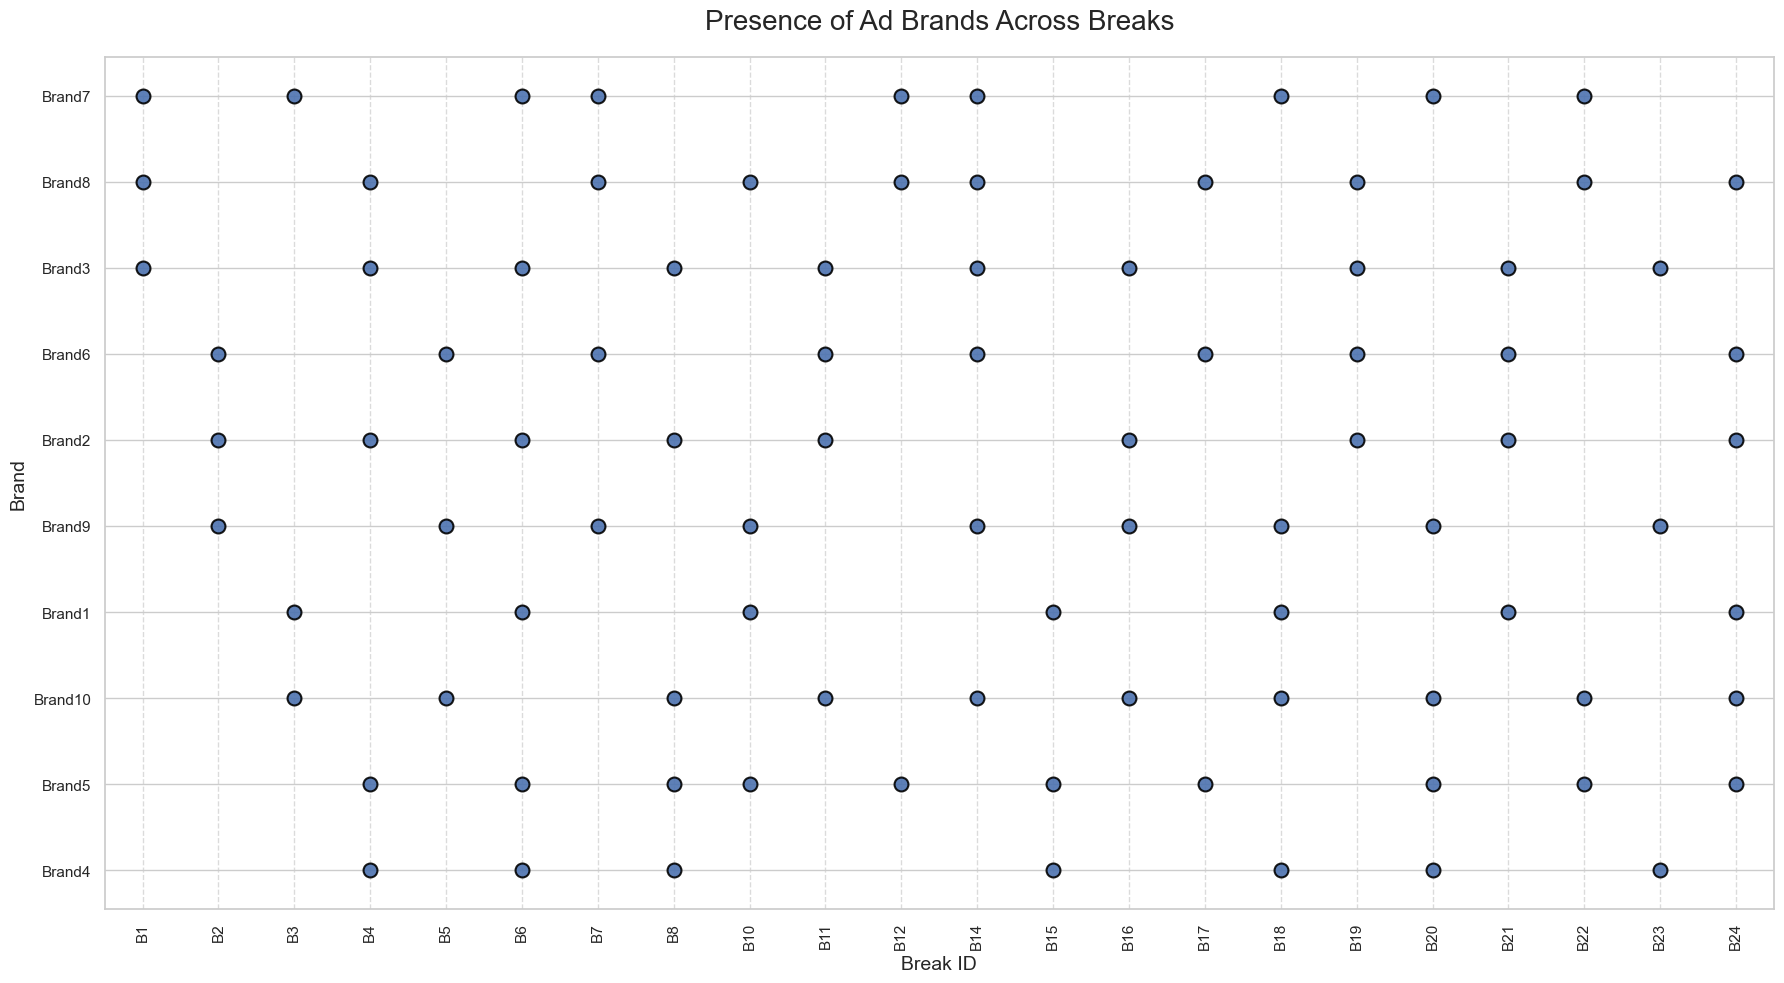

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- 1. 数据加载和预处理 ---

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage2_schedule.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 过滤掉未被排期的广告 (status 为 'Binned' 或 break_id 为 'BINNED')
df_scheduled = df[df['status'] == 'Scheduled'].copy()

# --- 2. 去重：确保每个 (break, brand) 组合只出现一次 ---
# 这是实现您需求的核心步骤。我们只关心品牌是否出现，不关心出现次数。
df_unique = df_scheduled[['break_id', 'brand']].drop_duplicates().reset_index(drop=True)

# --- 3. 对 break_id 进行自然排序 ---
# 为了让 X 轴上的 break_id 按照 B1, B2, B3... 而不是 B1, B10, B11... 的字母顺序排序
df_unique['break_num'] = df_unique['break_id'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
df_sorted_unique = df_unique.sort_values('break_num')

# 获取排序后唯一的 break_id 列表，以确保 X 轴的顺序是正确的
# 我们需要从原始的 df_scheduled 中获取完整的 break 顺序，以防某个 break 在去重后丢失
all_breaks_df = df_scheduled[['break_id']].copy()
all_breaks_df['break_num'] = all_breaks_df['break_id'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
break_order = all_breaks_df.sort_values('break_num')['break_id'].unique()


# --- 4. 可视化 ---

# 设置图表尺寸
plt.figure(figsize=(18, 10))

# 使用去重后的数据进行绘图
sns.stripplot(
    x='break_id',
    y='brand',
    data=df_sorted_unique,
    order=break_order,  # 强制指定 X 轴的顺序
    jitter=False,       # 移除抖动，让点精确地落在品牌线上
    size=10,            # 适当增大点的大小以便观察
    alpha=0.9,
    linewidth=1.5,
    edgecolor='black'   # 使用黑色边框让点更清晰
)

# 添加图表标题和坐标轴标签
plt.title('Presence of Ad Brands Across Breaks', fontsize=20, pad=20)
plt.xlabel('Break ID', fontsize=14)
plt.ylabel('Brand', fontsize=14)

# 旋转 X 轴标签以防重叠
plt.xticks(rotation=90, ha='center')

# 添加网格线，使 break 之间的分隔更清晰
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

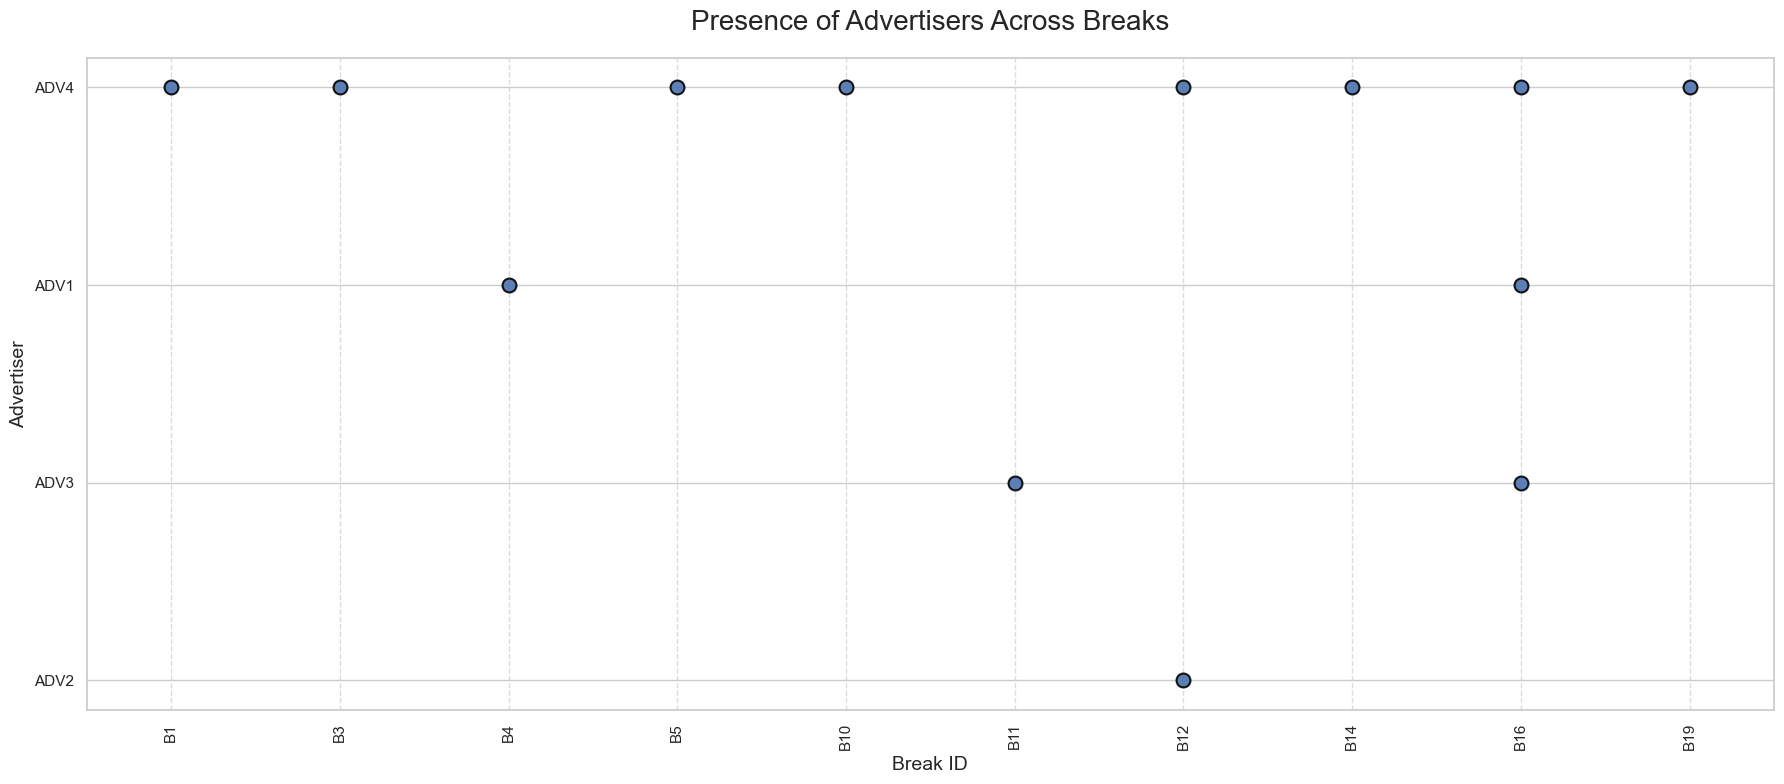

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- 1. 数据加载和预处理 ---

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage2_schedule.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 过滤掉未被排期的广告 (status 不为 'Scheduled')
df_scheduled = df[df['status'] == 'Scheduled'].copy()

# --- 2. 去重：确保每个 (break, advertiser) 组合只出现一次 ---
# 核心步骤：我们只关心广告商是否出现，不关心出现次数。
df_unique = df_scheduled[['break_id', 'advertiser']].drop_duplicates().reset_index(drop=True)

# --- 3. 对 break_id 进行自然排序 ---
# 提取 break_id 中的数字用于排序，确保 X 轴顺序正确
df_unique['break_num'] = df_unique['break_id'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
df_sorted_unique = df_unique.sort_values('break_num')

# 从原始数据中获取完整的、排序后的 break_id 列表，作为 X 轴的顺序
all_breaks_df = df_scheduled[['break_id']].copy()
all_breaks_df['break_num'] = all_breaks_df['break_id'].apply(lambda x: int(re.findall(r'\d+', x)[0]))
break_order = all_breaks_df.sort_values('break_num')['break_id'].unique()


# --- 4. 可视化 ---

# 设置图表尺寸
plt.figure(figsize=(18, 8)) # 调整了高度以适应 advertiser 的数量

# 使用去重后的数据进行绘图
sns.stripplot(
    x='break_id',
    y='advertiser',  # <--- 主要改动：Y 轴现在是 advertiser
    data=df_sorted_unique,
    order=break_order,
    jitter=False,
    size=10,
    alpha=0.9,
    linewidth=1.5,
    edgecolor='black'
)

# 添加图表标题和坐标轴标签
plt.title('Presence of Advertisers Across Breaks', fontsize=20, pad=20) # <--- 更新标题
plt.xlabel('Break ID', fontsize=14)
plt.ylabel('Advertiser', fontsize=14) # <--- 更新 Y 轴标签

# 旋转 X 轴标签以防重叠
plt.xticks(rotation=90, ha='center')

# 添加网格线
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

# stage 3

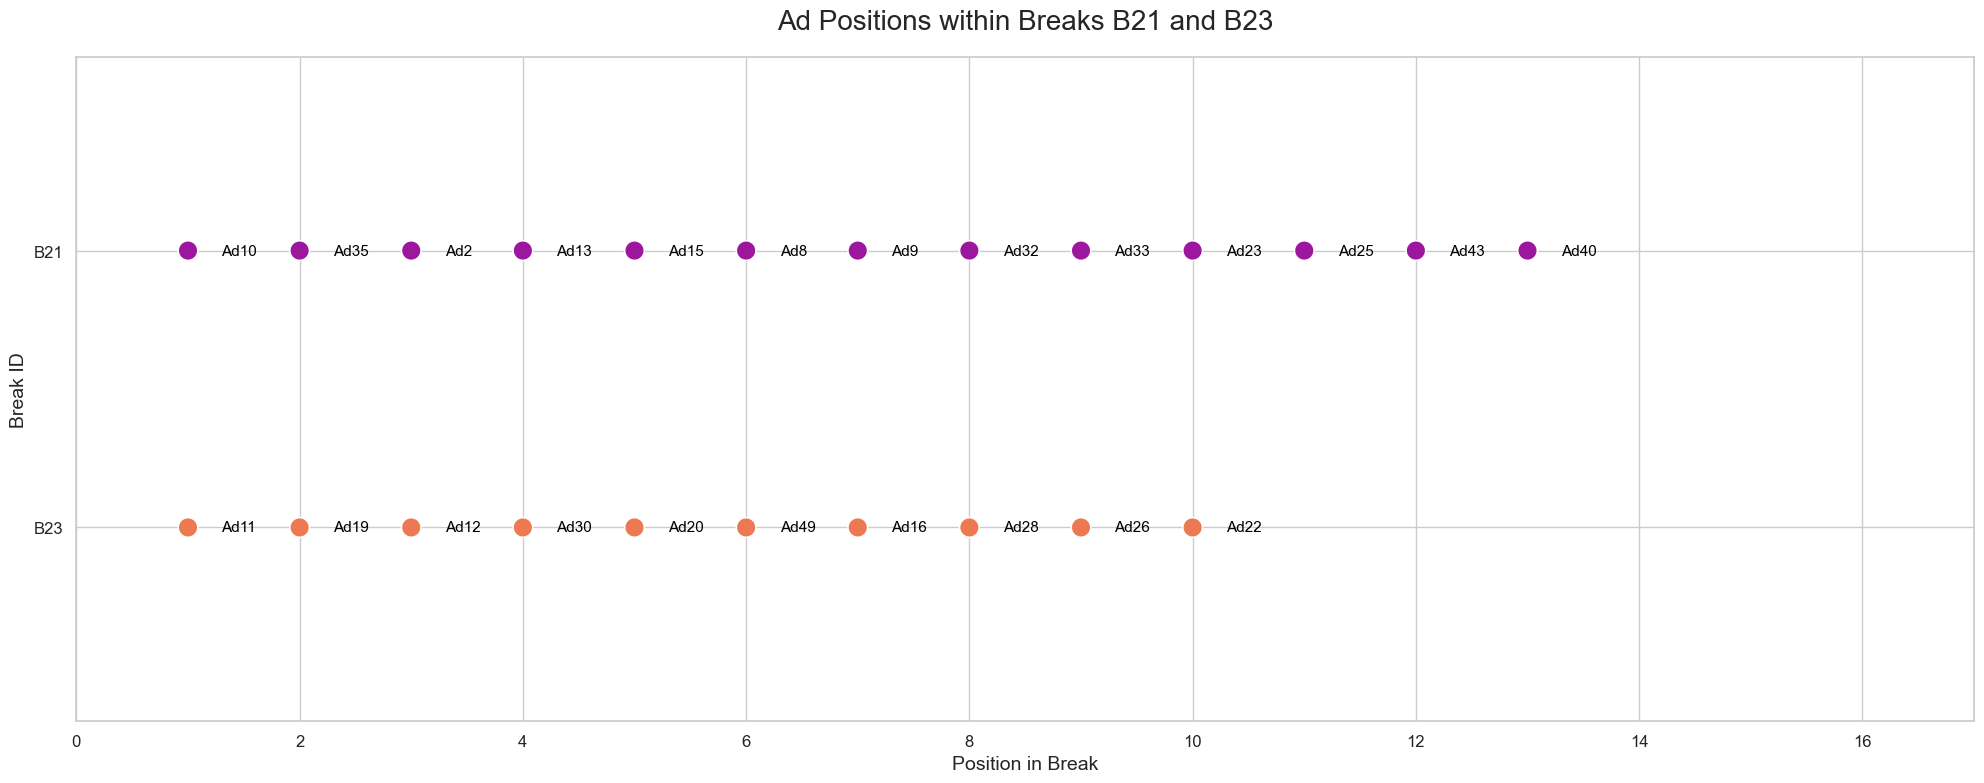

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- 1. 数据加载和筛选 ---

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage3_positions.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 根据您提供的图片，筛选出 B21 和 B23
selected_breaks = ['B21', 'B23']
df_filtered = df[df['break_id'].isin(selected_breaks)].copy()


# --- 2. 对筛选后的数据进行排序 ---

# 创建一个数字列用于排序
df_filtered['break_num'] = df_filtered['break_id'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# 按照 break 编号和 break 内的位置进行排序
df_sorted = df_filtered.sort_values(by=['break_num', 'position'])


# --- 3. 可视化 ---

# 设置图表美学风格和尺寸
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 8)) # 调整了高度以适应两个分组

# 创建散点图
ax = sns.scatterplot(
    x='position',
    y='break_id',
    data=df_sorted,
    s=200,
    hue='break_id',
    legend=False,
    palette='plasma'
)

# --- 4. 在每个点的旁边标注 ad_id ---

# 遍历排序后的数据，为每个点添加文本标签
for index, row in df_sorted.iterrows():
    ax.text(
        row['position'] + 0.3,
        row['break_id'],
        row['ad_id'],
        color='black',
        ha='left',
        va='center',
        fontsize=11
    )

# --- 5. 图表美化 ---

# 更新标题
plt.title('Ad Positions within Breaks B21 and B23', fontsize=20, pad=20)
plt.xlabel('Position in Break', fontsize=14)
plt.ylabel('Break ID', fontsize=14)

# --- 核心改动：调整 Y 轴范围以实现垂直居中 ---
# 当只有两个分类时，它们被绘制在 y=0 和 y=1 的位置。
# 通过扩大 Y 轴的上下边距，可以让这两行点看起来更居中。
# 我们将 Y 轴范围设置为 (-0.7, 1.7)，然后翻转它。
ax.set_ylim(1.7, -0.7)

# 调整 X 轴范围
plt.xlim(0, df_sorted['position'].max() + 4)

# 调整刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

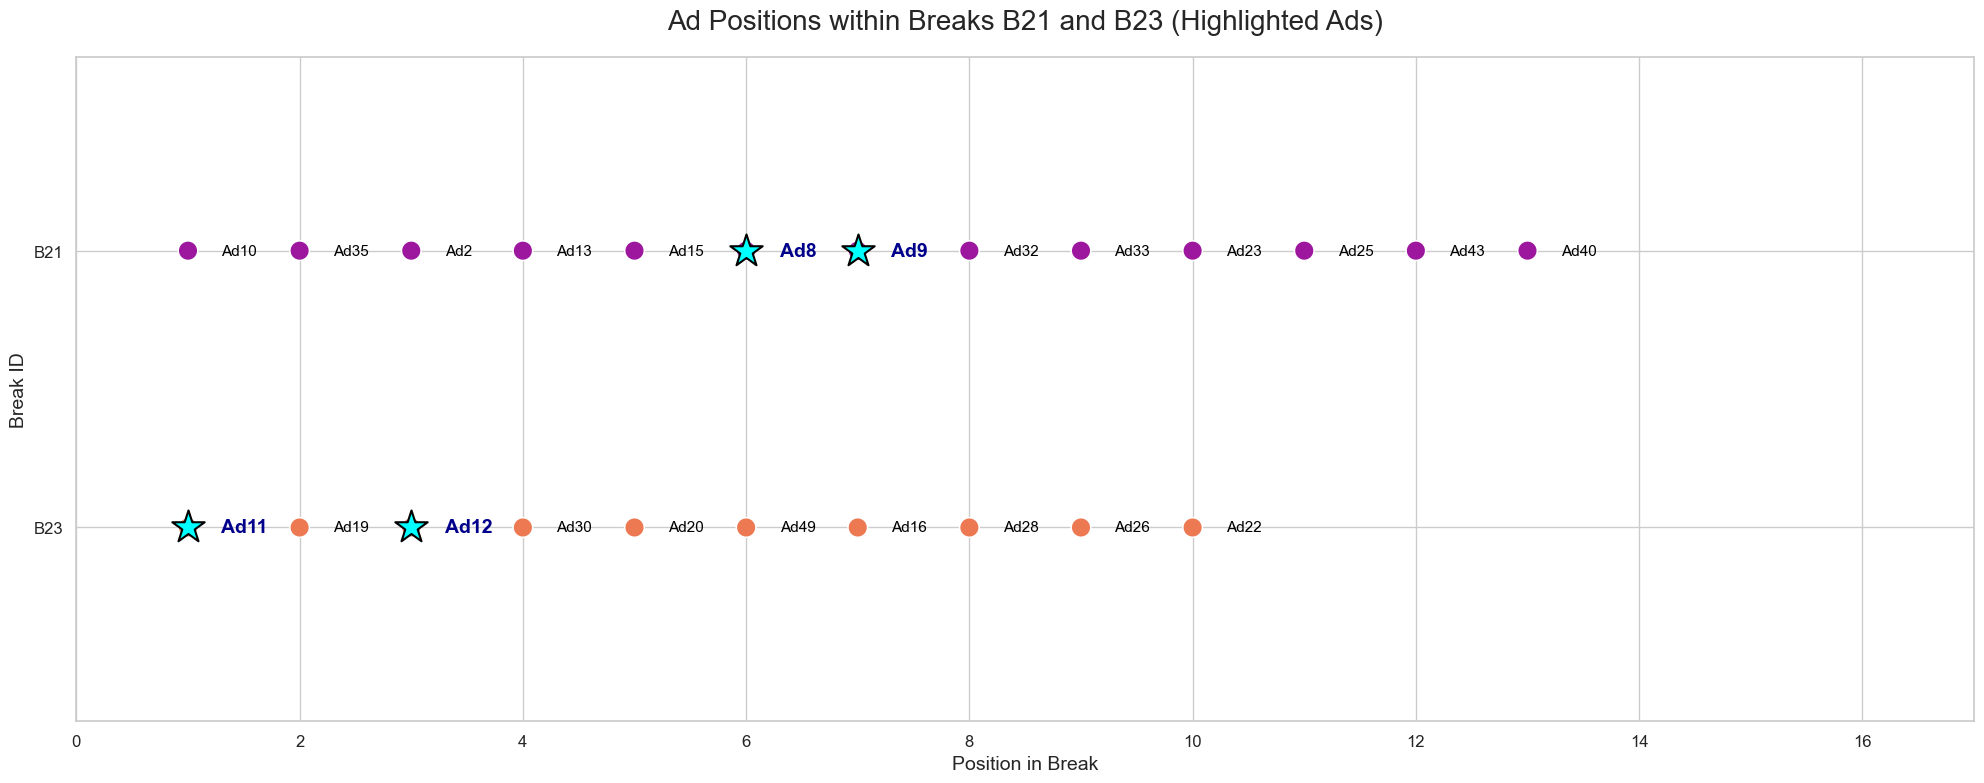

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- 1. 数据加载和筛选 ---

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage3_positions.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# 筛选出 B21 和 B23
selected_breaks = ['B21', 'B23']
df_filtered = df[df['break_id'].isin(selected_breaks)].copy()

# 定义需要突出的广告
highlight_ads = ['Ad8', 'Ad9', 'Ad11', 'Ad12']

# --- 2. 对数据进行排序和分组 ---

# 创建一个数字列用于排序
df_filtered['break_num'] = df_filtered['break_id'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# 按照 break 编号和 break 内的位置进行排序
df_sorted = df_filtered.sort_values(by=['break_num', 'position'])

# 单独筛选出需要高亮的数据点
df_highlight = df_sorted[df_sorted['ad_id'].isin(highlight_ads)]


# --- 3. 可视化 ---

# 设置图表美学风格和尺寸
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 8))

# 首先，绘制所有点的基础散点图
ax = sns.scatterplot(
    x='position',
    y='break_id',
    data=df_sorted,
    s=200,
    hue='break_id',
    legend=False,
    palette='plasma'
)

# 其次，如果找到了需要高亮的点，就在上方用不同样式叠加绘制它们
if not df_highlight.empty:
    sns.scatterplot(
        x='position',
        y='break_id',
        data=df_highlight,
        s=600,               # 突出：更大的尺寸
        color='cyan',        # 突出：鲜明的颜色
        edgecolor='black',   # 突出：黑色边框
        linewidth=1.5,
        marker='*',          # 突出：使用星形标记
        legend=False,
        ax=ax                # 确保在同一个图上绘制
    )

# --- 4. 在每个点的旁边标注 ad_id (并突出特定标签) ---

# 遍历所有排序后的数据，为每个点添加文本标签
for index, row in df_sorted.iterrows():
    # 判断是否是需要突出的广告，并设置不同字体样式
    if row['ad_id'] in highlight_ads:
        font_color = 'darkblue'
        font_weight = 'bold'
        font_size = 14
    else:
        font_color = 'black'
        font_weight = 'normal'
        font_size = 11

    ax.text(
        row['position'] + 0.3,
        row['break_id'],
        row['ad_id'],
        color=font_color,
        ha='left',
        va='center',
        fontsize=font_size,
        fontweight=font_weight
    )

# --- 5. 图表美化 ---

# 更新标题
plt.title('Ad Positions within Breaks B21 and B23 (Highlighted Ads)', fontsize=20, pad=20)
plt.xlabel('Position in Break', fontsize=14)
plt.ylabel('Break ID', fontsize=14)

# 调整 Y 轴范围以实现垂直居中
ax.set_ylim(1.7, -0.7)

# 调整 X 轴范围
plt.xlim(0, df_sorted['position'].max() + 4)

# 调整刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

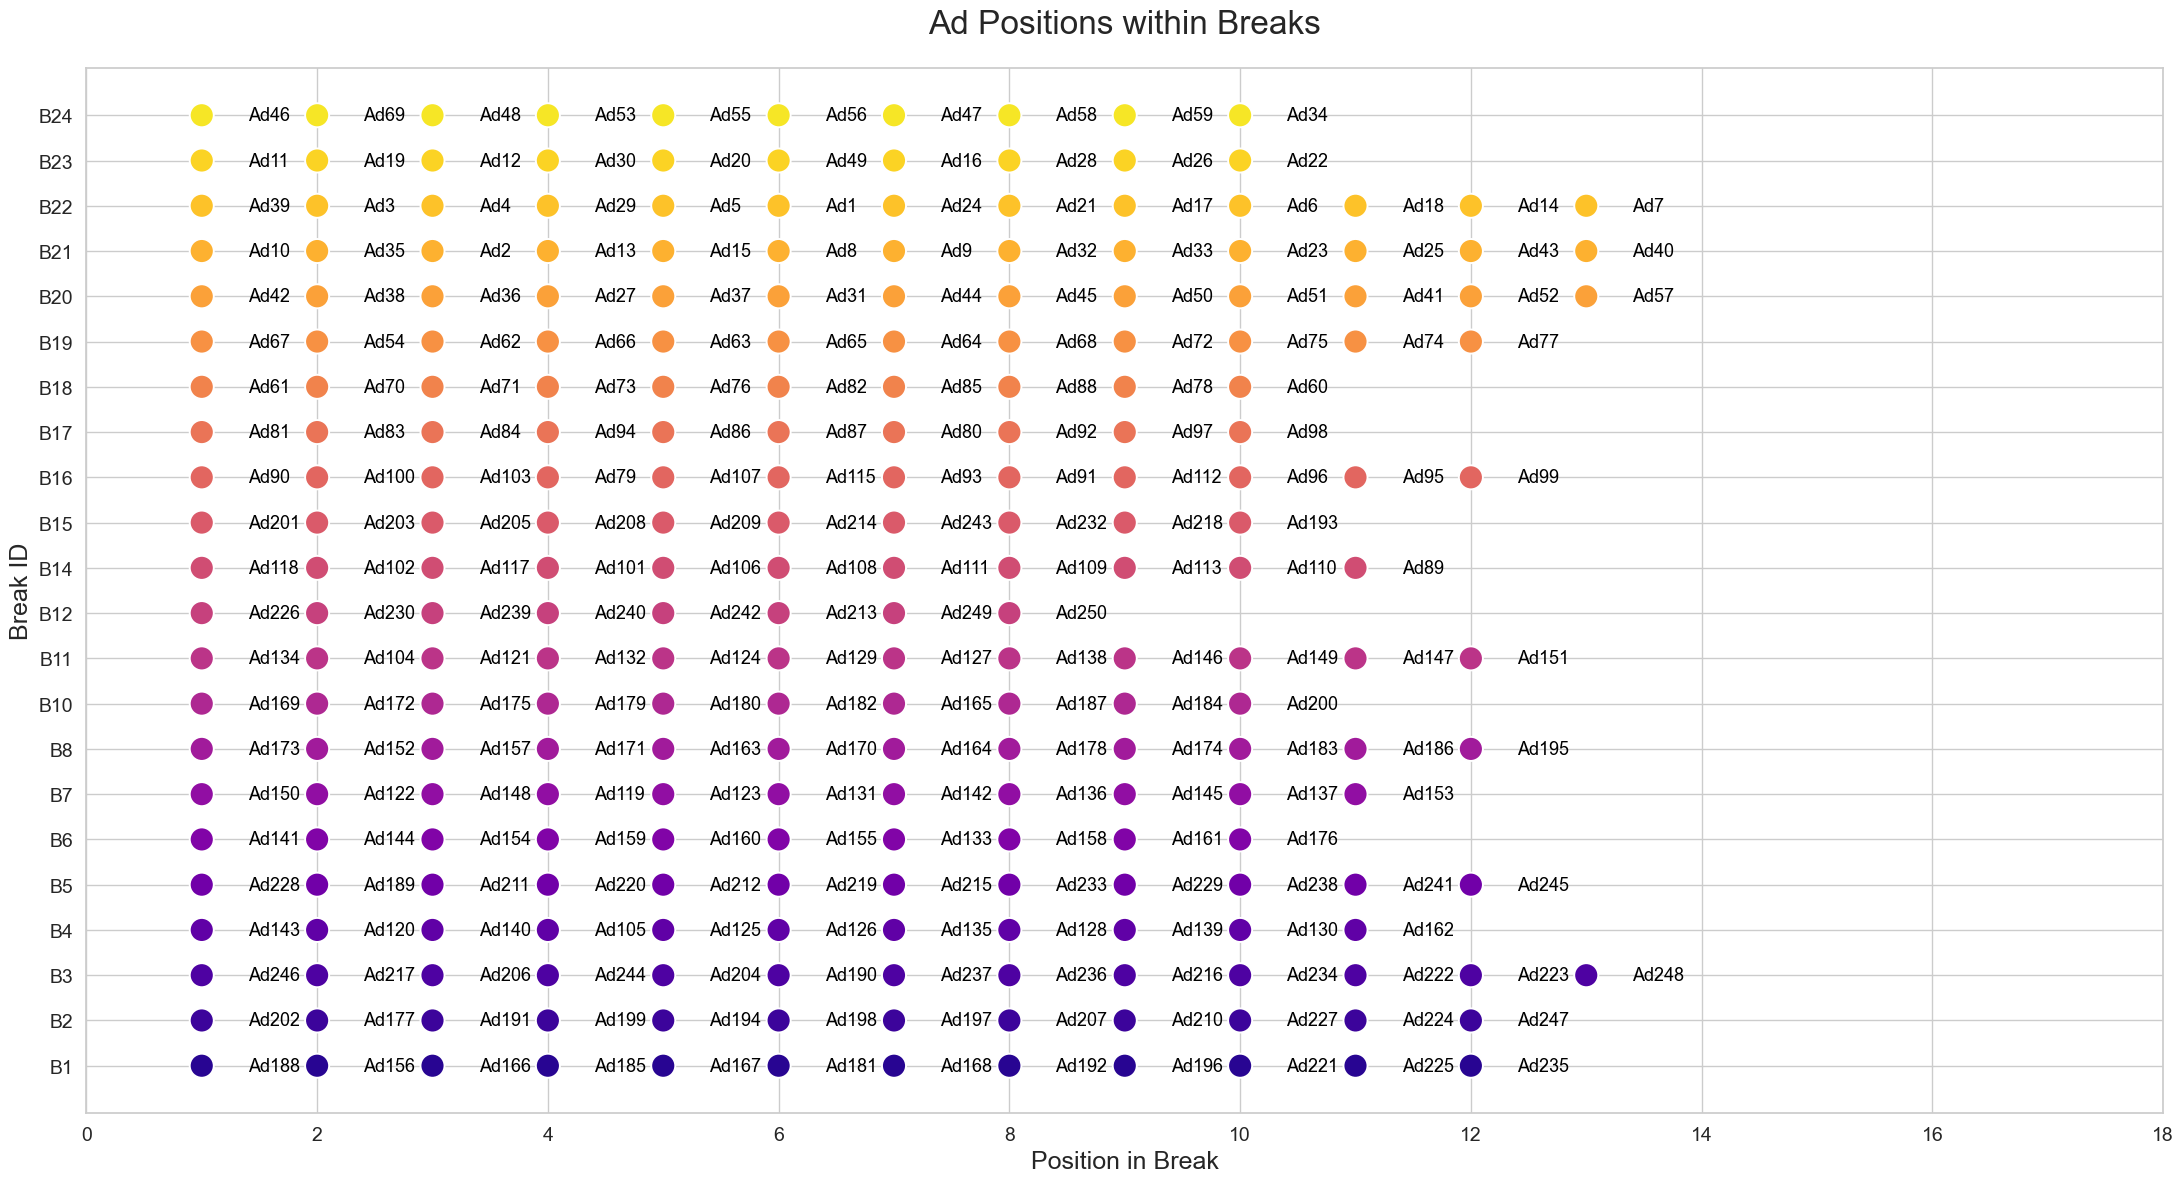

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- 1. 数据加载和筛选 ---

# 设置文件路径
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage3_positions.csv'

# 读取 CSV 文件
df = pd.read_csv(file_path)

# # 只筛选出您指定的 breaks
df_filtered = df.copy()
# selected_breaks = ['B12', 'B16', 'B19']
# df_filtered = df[df['break_id'].isin(selected_breaks)].copy()


# --- 2. 对筛选后的数据进行排序 ---

# 创建一个数字列用于排序
df_filtered['break_num'] = df_filtered['break_id'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# 按照 break 编号和 break 内的位置进行排序
df_sorted = df_filtered.sort_values(by=['break_num', 'position'])


# --- 3. 可视化 ---

# 设置图表美学风格和尺寸 (增大尺寸以容纳更大的元素)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(22, 12))

# 使用筛选和排序后的数据创建散点图
ax = sns.scatterplot(
    x='position',
    y='break_id',
    data=df_sorted,
    s=300,  # <--- 改动：显著增大点的大小
    hue='break_id',
    legend=False,
    palette='plasma'
)

# --- 4. 在每个点的旁边标注 ad_id ---

# 遍历排序后的数据，为每个点添加文本标签
for index, row in df_sorted.iterrows():
    ax.text(
        row['position'] + 0.4,  # <--- 改动：增加标签与点的距离
        row['break_id'],
        row['ad_id'],
        color='black',
        ha='left',
        va='center',
        fontsize=13,  # <--- 改动：显著增大标签字体大小
        fontweight='medium'
    )

# --- 5. 图表美化 ---

# 更新标题以反映图表内容
plt.title('Ad Positions within Breaks', fontsize=24, pad=25)
plt.xlabel('Position in Break', fontsize=18)
plt.ylabel('Break ID', fontsize=18)

# 翻转 Y 轴
ax.invert_yaxis()

# 调整 X 轴范围，为右侧的 ad_id 标签留出更多空间
plt.xlim(0, df_sorted['position'].max() + 5)

# 调整刻度字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 自动调整布局
plt.tight_layout()

# 显示图表
plt.show()

# complete

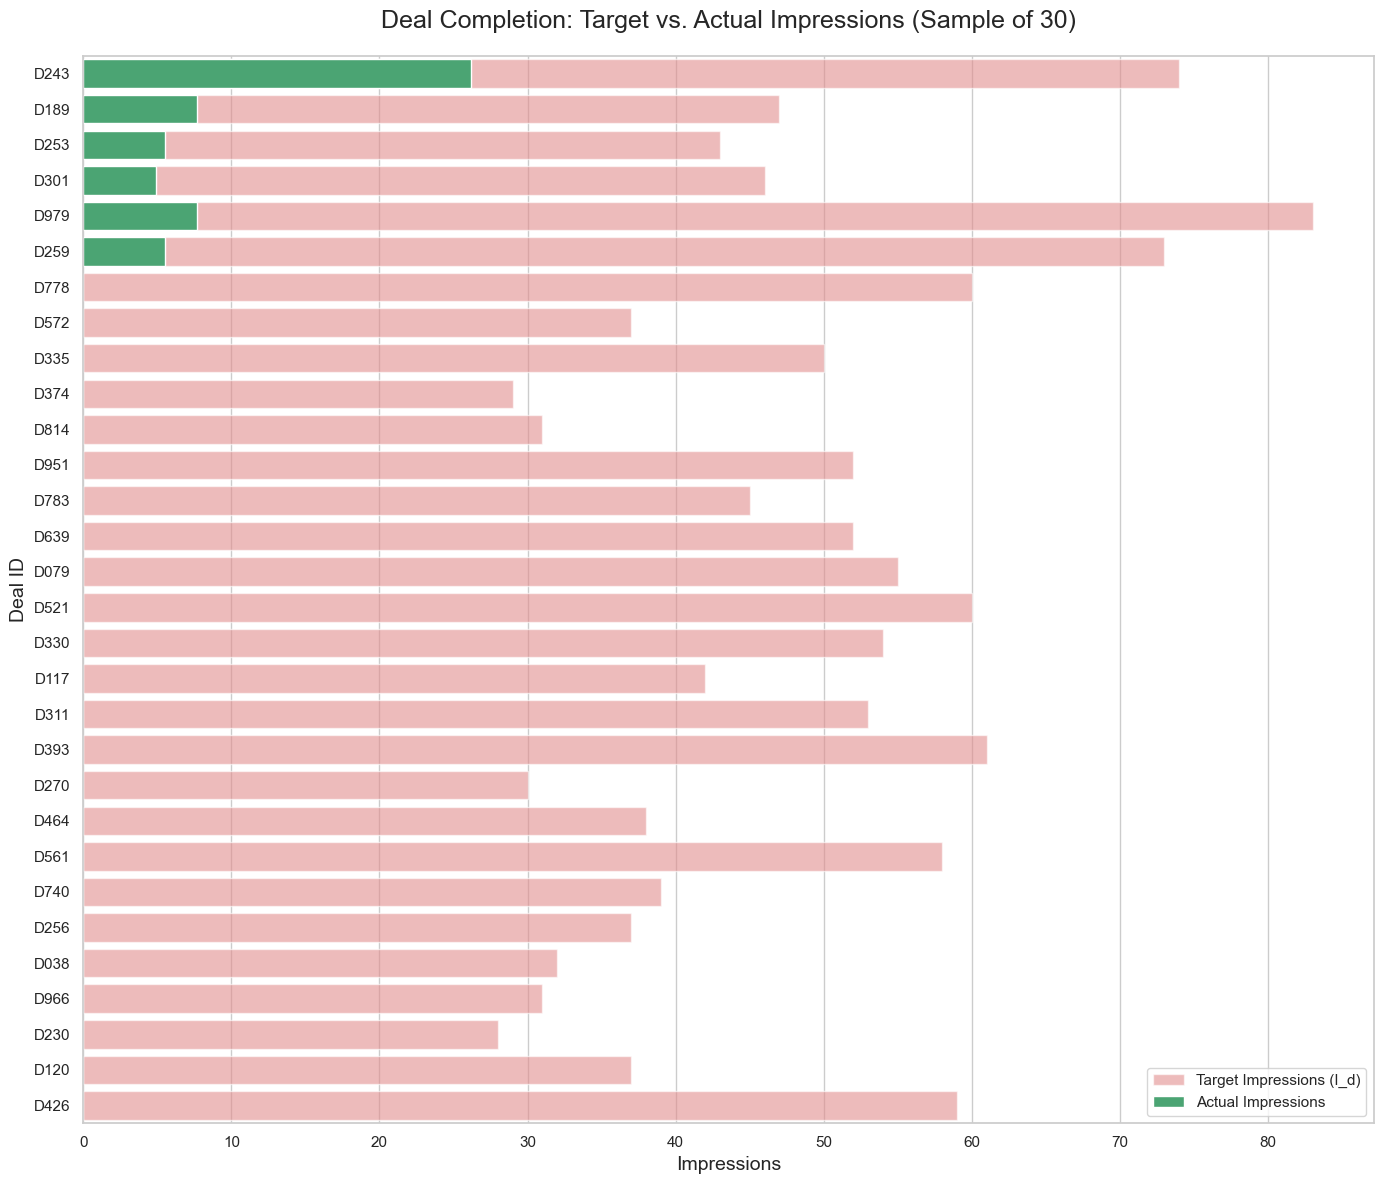

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 数据加载和抽样 ---
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/deal_completion.csv'
df = pd.read_csv(file_path)

# 随机抽取30条数据以便清晰展示，并按完成度排序
sample_df = df.sample(n=30, random_state=42).sort_values('completion', ascending=False)

# --- 可视化 ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 12))

# 1. 绘制目标曝光量 (I_d) 作为背景条
sns.barplot(x='I_d', y='deal_id', data=sample_df, color='lightcoral', alpha=0.6, label='Target Impressions (I_d)')

# 2. 绘制实际完成曝光量 (impressions) 覆盖其上
sns.barplot(x='impressions', y='deal_id', data=sample_df, color='mediumseagreen', label='Actual Impressions')

# --- 图表美化 ---
plt.title('Deal Completion: Target vs. Actual Impressions (Sample of 30)', fontsize=18, pad=20)
plt.xlabel('Impressions', fontsize=14)
plt.ylabel('Deal ID', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/6q/x5wrhmps6wl4c9xg_k22gx7m0000gn/T/ipykernel_6063/3357980020.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample_df = df_merged.groupby('weight_tier', group_keys=False).apply(differential_sampler)
/var/folders/6q/x5wrhmps6wl4c9xg_k22gx7m0000gn/T/ipykernel_6063/3357980020.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample_df = df_merged.groupby('weight_tier', group_keys=False).apply(differential_sampler)
/var/folders/6q/x5wrhmps6wl4c9xg_k22gx7m0000gn/T/ipyk

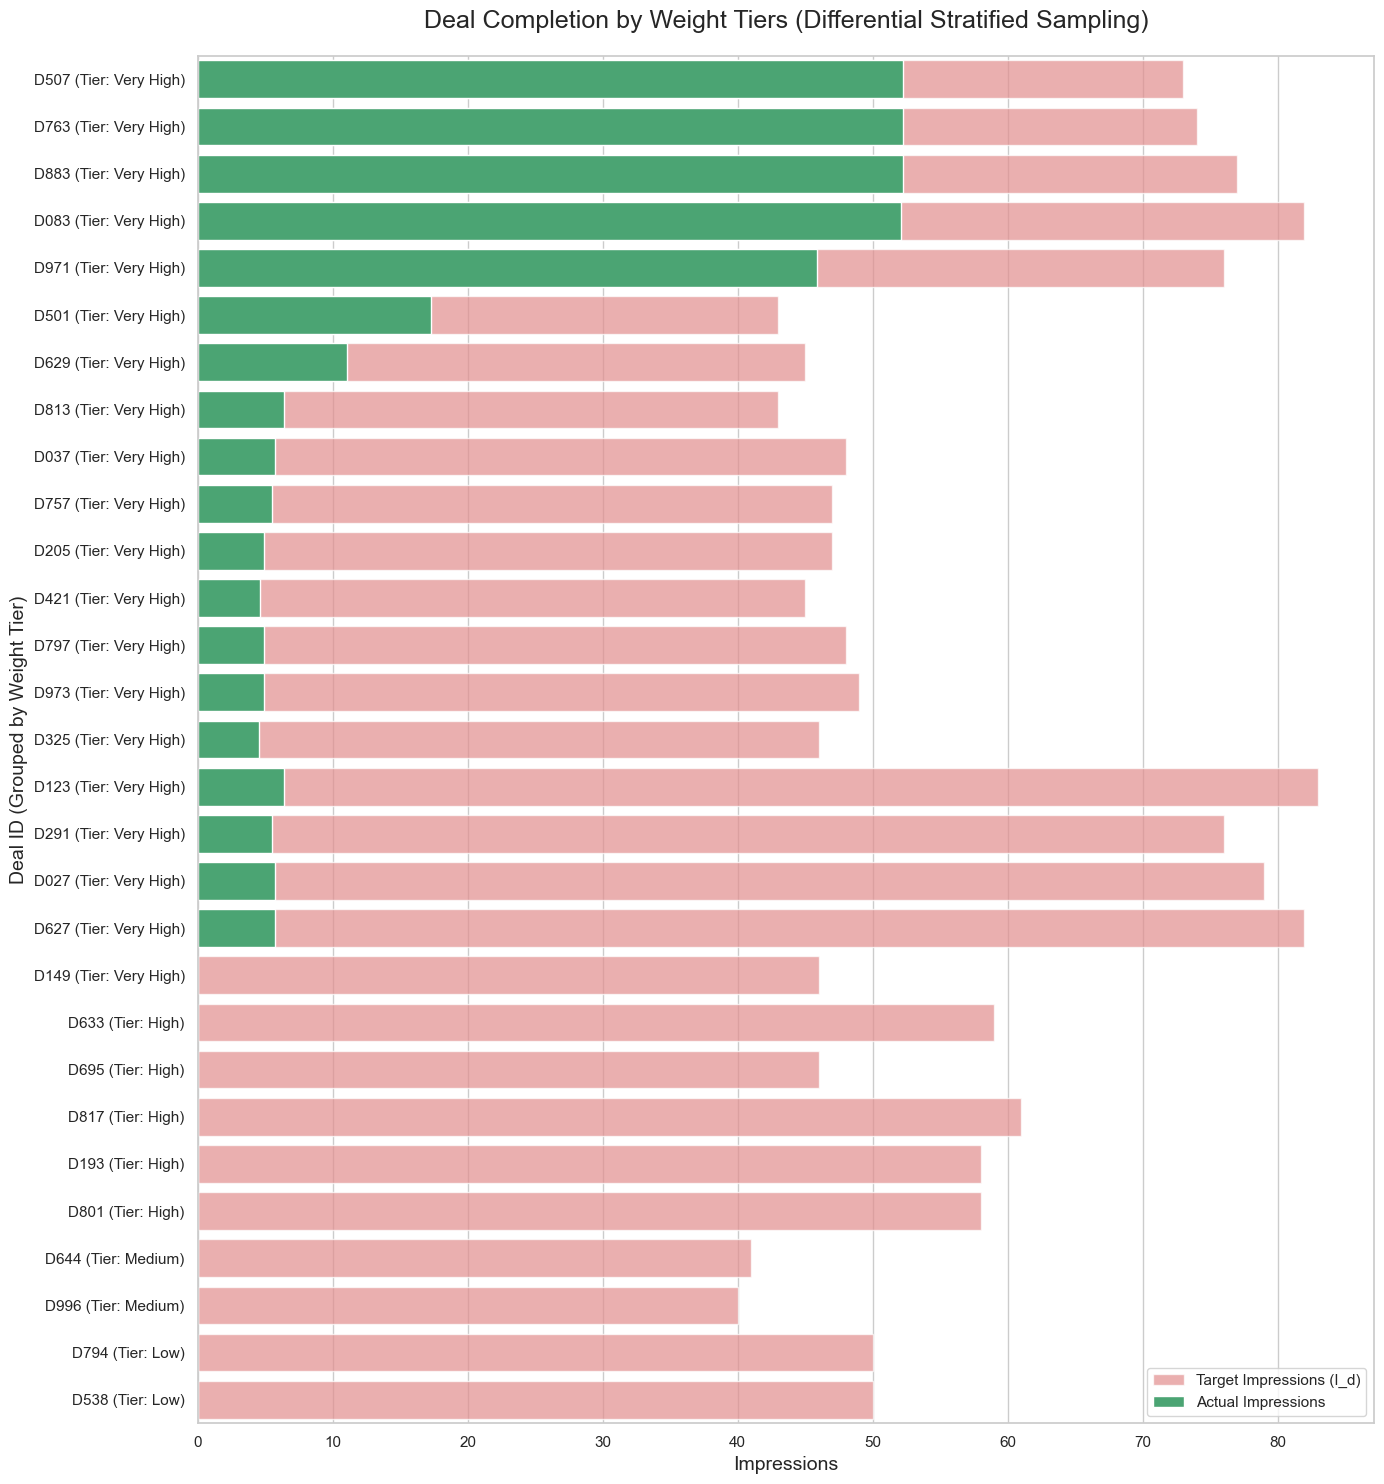

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 数据加载与合并 ---

# 定义文件路径
completion_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/deal_completion.csv'
weights_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage1_weights.csv'

# 读取数据
df_completion = pd.read_csv(completion_path)
df_weights = pd.read_csv(weights_path)

# 合并数据
df_merged = pd.merge(df_completion, df_weights[['deal_id', 'W_d']], on='deal_id', how='inner')


# --- 2. 分层与差异化抽样 (核心改动) ---

# 使用 pd.qcut 将权重分为4个等级
df_merged['weight_tier'] = pd.qcut(
    df_merged['W_d'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

# 定义每个等级要抽取的样本数量
samples_per_tier = {
    'Very High': 20,
    'High': 5,
    'Medium': 2,
    'Low':2
}

# 定义一个自定义抽样函数
def differential_sampler(group):
    tier = group.name
    n_samples = samples_per_tier.get(tier, 0)
    # 确保抽样数量不超过该组的实际数量
    return group.sample(n=min(len(group), n_samples), random_state=42)

# 应用差异化分层抽样
stratified_sample_df = df_merged.groupby('weight_tier', group_keys=False).apply(differential_sampler)

# 为了图表美观，我们按照权重等级和完成度进行排序
stratified_sample_df = stratified_sample_df.sort_values(
    by=['weight_tier', 'completion'],
    ascending=[False, False]
)


# --- 3. 可视化 ---

sns.set_theme(style="whitegrid")
# 调整图表高度以适应新的样本总数 (12+8+5+3=28)
plt.figure(figsize=(14, 15))

# 1. 绘制目标曝光量 (I_d) 作为背景条
sns.barplot(x='I_d', y='deal_id', data=stratified_sample_df, color='lightcoral', alpha=0.7, label='Target Impressions (I_d)')

# 2. 绘制实际完成曝光量 (impressions) 覆盖其上
sns.barplot(x='impressions', y='deal_id', data=stratified_sample_df, color='mediumseagreen', label='Actual Impressions')


# --- 4. 图表美化 ---

plt.title('Deal Completion by Weight Tiers (Differential Stratified Sampling)', fontsize=18, pad=20)
plt.xlabel('Impressions', fontsize=14)
plt.ylabel('Deal ID (Grouped by Weight Tier)', fontsize=14)
plt.legend(loc='lower right')

# 在Y轴标签旁显示其所属的权重等级
yticklabels = []
for i, deal_id in enumerate(stratified_sample_df['deal_id']):
    tier = stratified_sample_df.iloc[i]['weight_tier']
    yticklabels.append(f"{deal_id} (Tier: {tier})")
plt.gca().set_yticklabels(yticklabels)


plt.tight_layout()
plt.show()

/var/folders/6q/x5wrhmps6wl4c9xg_k22gx7m0000gn/T/ipykernel_6063/1074807087.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample_df = df_merged.groupby('weight_tier', group_keys=False).apply(differential_sampler)
/var/folders/6q/x5wrhmps6wl4c9xg_k22gx7m0000gn/T/ipykernel_6063/1074807087.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample_df = df_merged.groupby('weight_tier', group_keys=False).apply(differential_sampler)


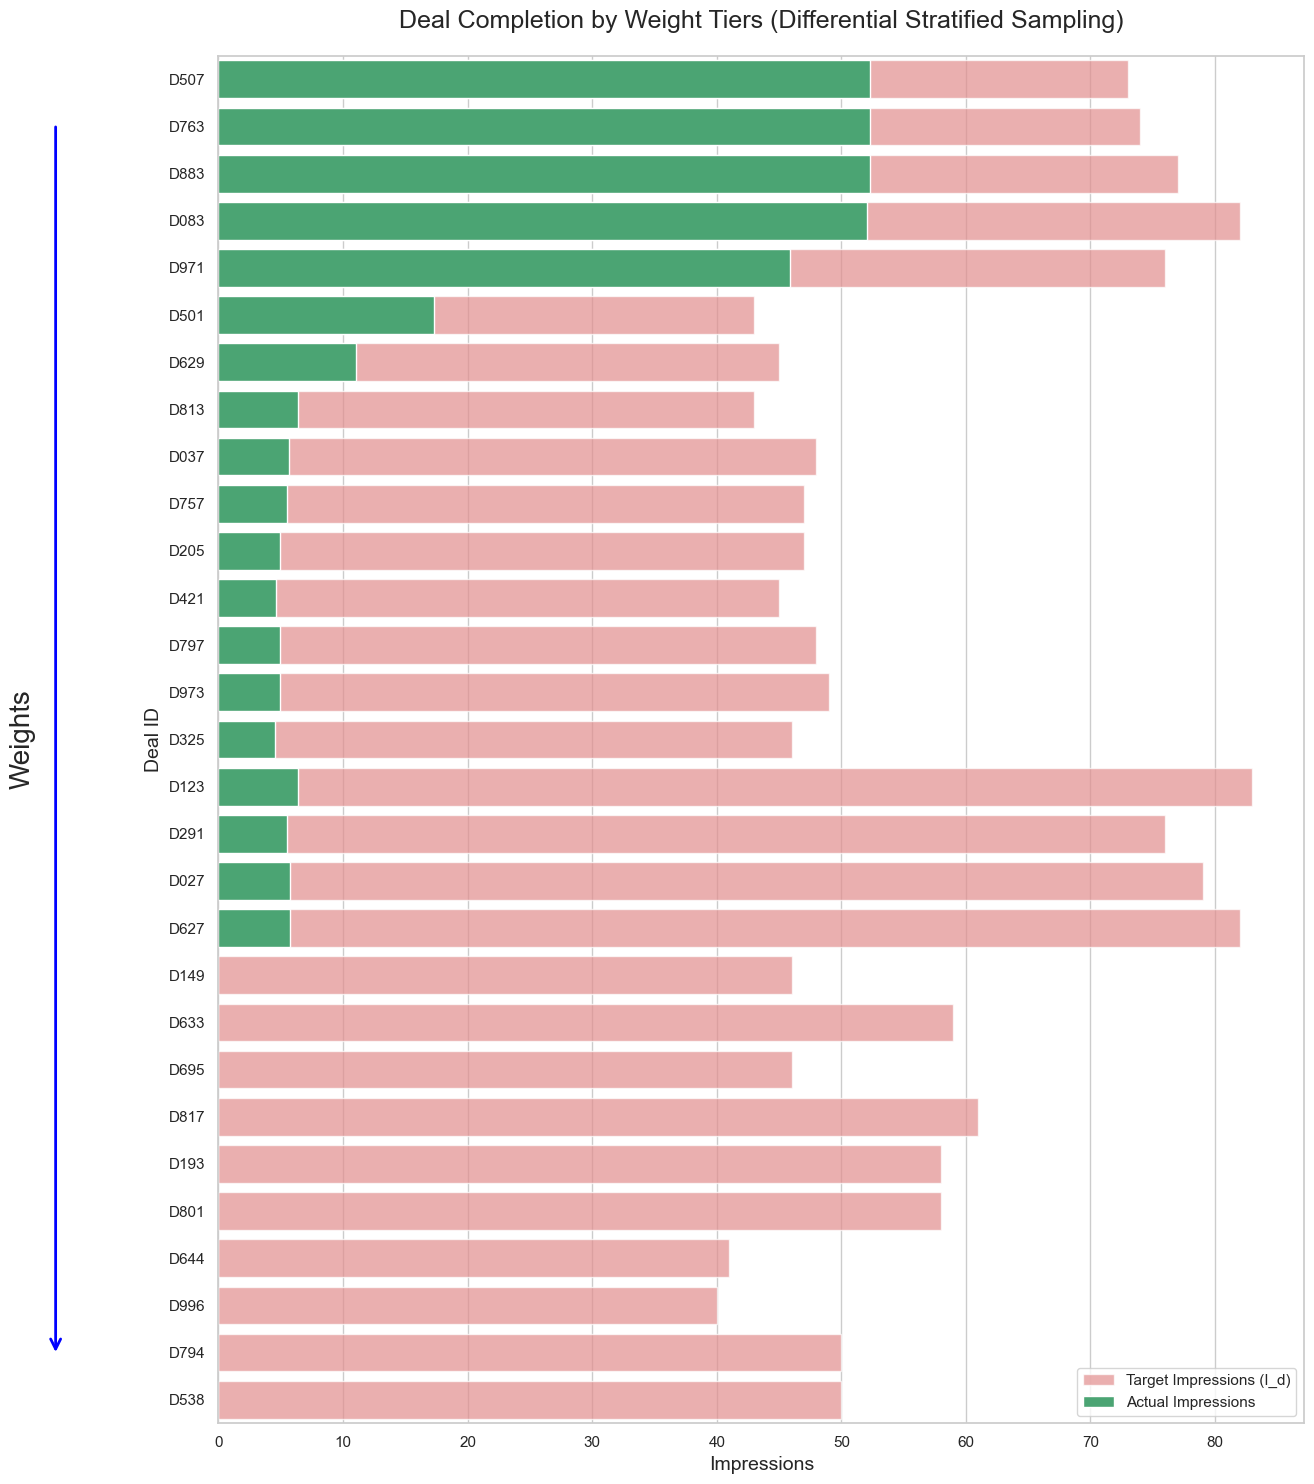

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 数据加载与合并 ---

# 定义文件路径
completion_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/deal_completion.csv'
weights_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage1_weights.csv'

# 读取数据
df_completion = pd.read_csv(completion_path)
df_weights = pd.read_csv(weights_path)

# 合并数据
df_merged = pd.merge(df_completion, df_weights[['deal_id', 'W_d']], on='deal_id', how='inner')


# --- 2. 分层与差异化抽样 ---

# 使用 pd.qcut 将权重分为4个等级
df_merged['weight_tier'] = pd.qcut(
    df_merged['W_d'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

samples_per_tier = {
    'Very High': 20,
    'High': 5,
    'Medium': 2,
    'Low':2
}

# 定义一个自定义抽样函数
def differential_sampler(group):
    tier = group.name
    n_samples = samples_per_tier.get(tier, 0)
    return group.sample(n=min(len(group), n_samples), random_state=42)

# 应用差异化分层抽样
stratified_sample_df = df_merged.groupby('weight_tier', group_keys=False).apply(differential_sampler)

# 按照权重等级和完成度进行排序
stratified_sample_df = stratified_sample_df.sort_values(
    by=['weight_tier', 'completion'],
    ascending=[False, False]
)


# --- 3. 可视化 ---

sns.set_theme(style="whitegrid")
# 显式创建 Figure 和 Axes 对象，以便更精细地控制图表元素
fig, ax = plt.subplots(figsize=(14, 15))

# 1. 绘制目标曝光量 (I_d) 作为背景条
sns.barplot(x='I_d', y='deal_id', data=stratified_sample_df, color='lightcoral', alpha=0.7, label='Target Impressions (I_d)', ax=ax)

# 2. 绘制实际完成曝光量 (impressions) 覆盖其上
sns.barplot(x='impressions', y='deal_id', data=stratified_sample_df, color='mediumseagreen', label='Actual Impressions', ax=ax)


# --- 4. 图表美化 ---

ax.set_title('Deal Completion by Weight Tiers (Differential Stratified Sampling)', fontsize=18, pad=20)
ax.set_xlabel('Impressions', fontsize=14)
ax.set_ylabel('Deal ID', fontsize=14) # 简化Y轴标签
ax.legend(loc='lower right')

# 核心改动：添加一个带文字的箭头来指示权重顺序
# 使用 'axes fraction' 坐标系，(0,0)是左下角, (1,1)是右上角
# 我们在 x=-0.15 的位置（图表左侧）画一个从 y=0.95 到 y=0.05 的箭头
ax.annotate(
    '', 
    xy=(-0.15, 0.05), xycoords='axes fraction',
    xytext=(-0.15, 0.95), textcoords='axes fraction',
    arrowprops=dict(arrowstyle='->, head_length=0.6, head_width=0.3', color='blue', lw=2)
)

# 在箭头旁边添加 "Weights" 文字
ax.annotate(
    'Weights',
    xy=(-0.18, 0.5), xycoords='axes fraction',
    ha='center', va='center', rotation=90,
    fontsize=20
)

# 调整布局以确保箭头和文字不会被裁剪
fig.tight_layout(rect=[0.05, 0, 1, 1])

plt.show()

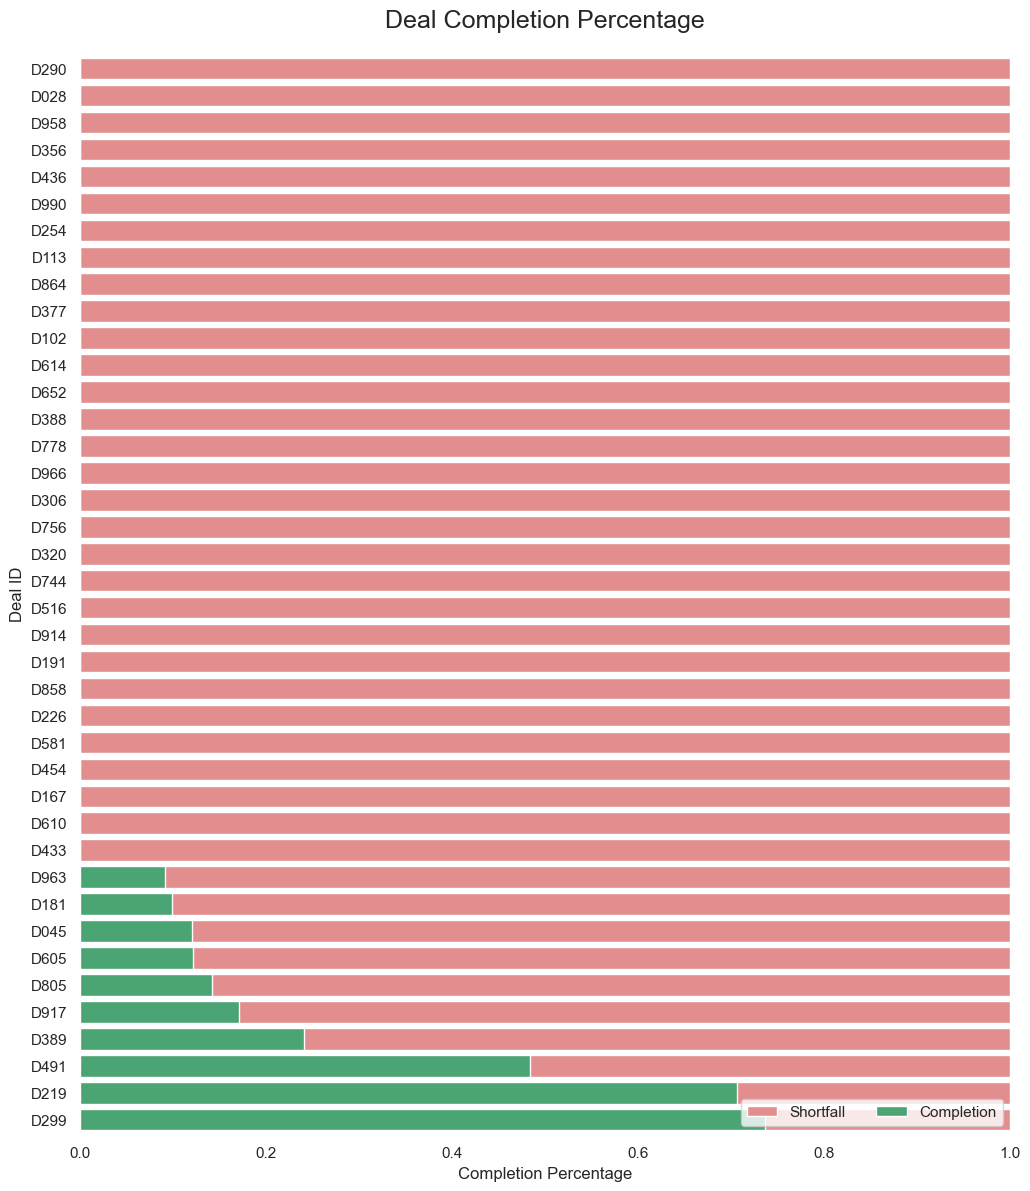

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 数据加载和准备 ---
file_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/deal_completion.csv'
df = pd.read_csv(file_path)

# 计算不足比例
df['shortfall_pct'] = 1 - df['completion']

# 抽样并排序
sample_df = df.sample(n=40, random_state=30).sort_values('completion', ascending=True)

# --- 可视化 ---
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(12, 14))

# 1. 绘制总长度为100%的背景条 (完成+不足)
sns.barplot(x=sample_df['completion'] + sample_df['shortfall_pct'], y=sample_df['deal_id'], color="lightcoral", label='Shortfall')

# 2. 绘制完成比例的条
sns.barplot(x=sample_df['completion'], y=sample_df['deal_id'], color="mediumseagreen", label='Completion')

# --- 图表美化 ---
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="Deal ID", xlabel="Completion Percentage")
plt.title('Deal Completion Percentage', fontsize=18, pad=20)
sns.despine(left=True, bottom=True)

plt.show()

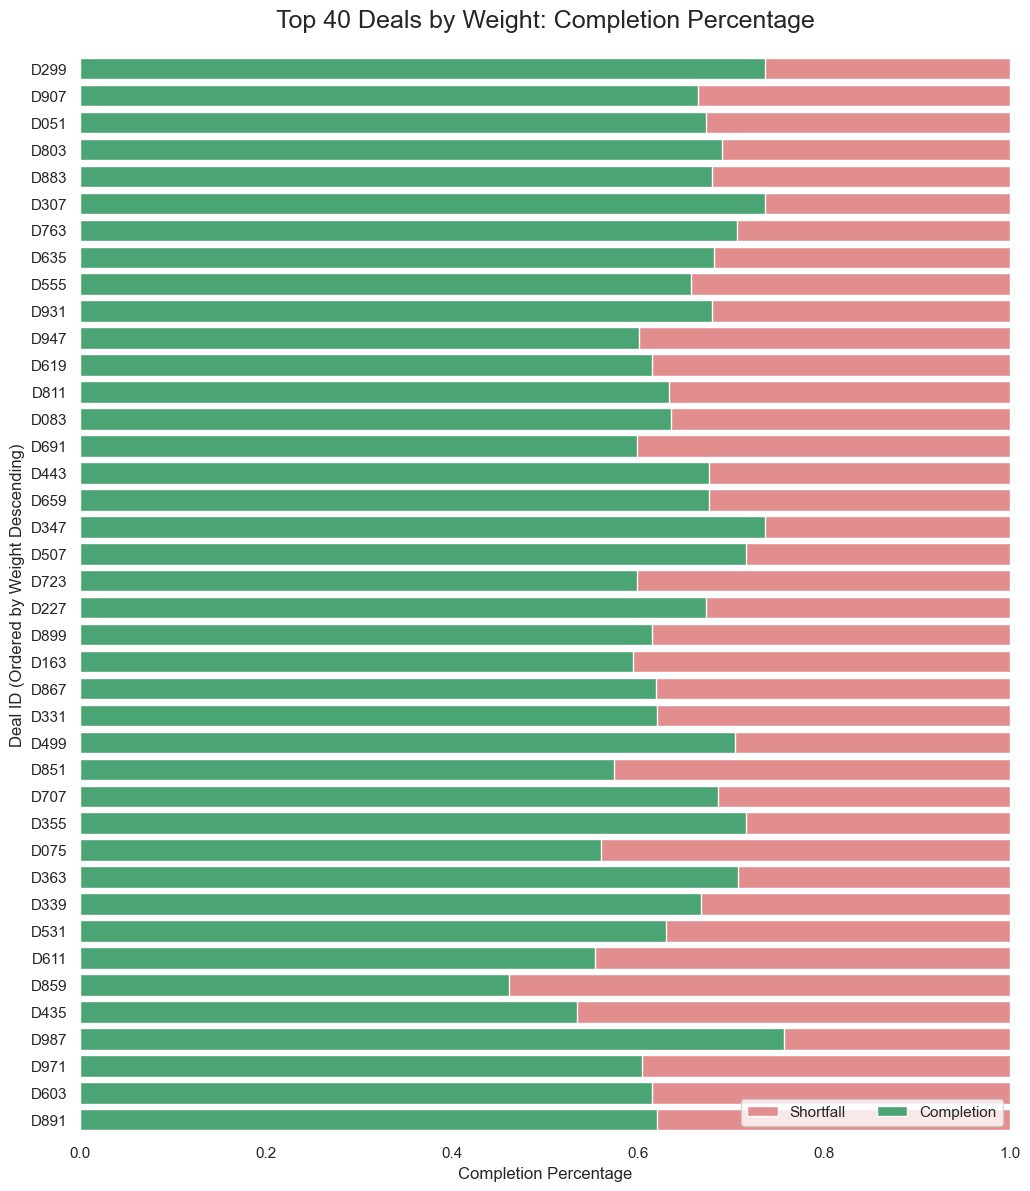

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. 数据加载与合并 ---

# 定义文件路径
completion_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/deal_completion.csv'
weights_path = '/Users/bytedance/PycharmProjects/Scheduling-Advertising-on-Cable-Television/output/stage1_weights.csv'

# 读取数据
df_completion = pd.read_csv(completion_path)
df_weights = pd.read_csv(weights_path)

# 使用 'deal_id' 作为共同键，将两个 DataFrame 合并
df_merged = pd.merge(df_completion, df_weights[['deal_id', 'W_d']], on='deal_id', how='inner')


# --- 2. 排序与筛选 ---

# 按照权重 'W_d' 从大到小进行排序
# 这将决定Y轴上deal_id的显示顺序
df_sorted_by_weight = df_merged.sort_values('W_d', ascending=False)

# 选取权重排名前40的交易进行可视化
top_n = 40
df_top = df_sorted_by_weight.head(top_n).copy() # 使用 .copy() 避免后续操作的警告


# --- 3. 可视化 ---
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(12, 14))

# 为了创建堆叠图，我们先画一个代表100%的背景条，然后在上面画代表完成度的条
# 因为 df_top 已经按权重排好序，seaborn会按此顺序绘制Y轴

# 1. 绘制总长度为100%的背景条 (代表“不足”的部分)
sns.barplot(x=[1]*len(df_top), y='deal_id', data=df_top, color="lightcoral", label='Shortfall', ax=ax)

# 2. 绘制“完成比例”的条 (覆盖在背景之上)
sns.barplot(x='completion', y='deal_id', data=df_top, color="mediumseagreen", label='Completion', ax=ax)


# --- 4. 图表美化 ---
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="Deal ID (Ordered by Weight Descending)", xlabel="Completion Percentage")
plt.title(f'Top {top_n} Deals by Weight: Completion Percentage', fontsize=18, pad=20)
sns.despine(left=True, bottom=True)

plt.show()